### 1. Introduction

**Understanding the behavioral risk factor surveillance system (BRFSS)**

The Behavioral Risk Factor Surveillance System (BRFSS) represents a collaborative initiative between all states in the United States, including participating territories, and the Centers for Disease Control and Prevention (CDC). Its primary objective is to systematically collect comprehensive and standardized state-specific data concerning health risk behaviors, chronic diseases, access to healthcare, and the utilization of preventive health services. Through surveys conducted via both landline and mobile phones among individuals aged 18 and above, the BRFSS seeks to uncover the critical factors contributing to the incidence of various pathologies in the United States. This dataset is a robust resource containing 401,958 rows and 279 columns, providing rich and detailed insights into the various health aspects under investigation.

**Exploring the research questions**

In this project, we aim to unravel the complex interplay of factors influencing the emergence of pathologies by analyzing the extensive BRFSS dataset. Our research explores pivotal questions such as:

- What are the specific risk factors or behaviors associated with particular pathologies?
- Which determinants significantly impact the onset and progression of various health disorders?
- How can we construct predictive models for medical conditions based on identified risk behaviors?
- What is the interplay between healthcare accessibility and the progression of different diseases?
- Are there discernible correlations between different pathological conditions within the dataset?

**Methodology and analytical tools**

To address these questions, we have adopted a meticulous methodology and employed a suite of advanced tools. Beginning with the data cleaning and preparation stage, we leveraged Python libraries such as pandas and numpy. Subsequently, we conducted in-depth exploratory data analysis using powerful visualization tools like Seaborn and Matplotlib. Leveraging these insights, we developed an interactive dashboard with Power BI, highlighting the most significant findings. Additionally, we conducted intricate machine learning tasks using Dataiku, enabling us to uncover complex patterns and relationships within the dataset.

### 2. Data and library import

This section outlines the initial steps of data analysis, focusing on the data import process and the introduction of essential libraries for our analysis.

In [343]:
# Loading required libraries for our analysis

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.preprocessing import LabelEncoder



pd.set_option('display.max_columns', None)
sns.set_style("whitegrid")

In [344]:
# Importing the dataset

df = pd.read_csv("/Users/julieedme/Documents/Jedha/Data_Analysis_Fullstack/Projet_Demoday/brfss2020.csv")

# Previewing the first rows of the dataset

df.head()

_STATE  FMONTH    IDATE  IMONTH  IDAY  IYEAR  DISPCODE       SEQNO  \
0     1.0     1.0  1042020       1     4   2020    1100.0  2020000001   
1     1.0     1.0  2072020       2     7   2020    1200.0  2020000002   
2     1.0     1.0  1232020       1    23   2020    1100.0  2020000003   
3     1.0     1.0  1092020       1     9   2020    1100.0  2020000004   
4     1.0     1.0  1042020       1     4   2020    1100.0  2020000005   

           _PSU  CTELENM1  PVTRESD1  COLGHOUS  STATERE1  CELPHONE  LADULT1  \
0  2.020000e+09       1.0       1.0       NaN       1.0       2.0      1.0   
1  2.020000e+09       1.0       1.0       NaN       1.0       2.0      1.0   
2  2.020000e+09       1.0       1.0       NaN       1.0       2.0      1.0   
3  2.020000e+09       1.0       1.0       NaN       1.0       2.0      1.0   
4  2.020000e+09       1.0       1.0       NaN       1.0       2.0      1.0   

   COLGSEX  NUMADULT  LANDSEX  NUMMEN  NUMWOMEN  RESPSLCT  SAFETIME  CTELNUM1  \
0      NaN       1.0      2.0     0.0       1.0       NaN       NaN       NaN   
1      NaN       1.0      2.0     0.0       1.0       NaN       NaN       NaN   
2      NaN       1.0      2.0     0.0       1.0       NaN       NaN       NaN   
3      NaN       1.0      2.0     0.0       1.0       NaN       NaN       NaN   
4      NaN       1.0      2.0     0.0       1.0       NaN       NaN       NaN   

   CELLFON5  CADULT1  CELLSEX  PVTRESD3  CCLGHOUS  CSTATE1  LANDLINE  HHADULT  \
0       NaN      NaN      NaN       NaN       NaN      NaN       NaN      NaN   
1       NaN      NaN      NaN       NaN       NaN      NaN       NaN      NaN   
2       NaN      NaN      NaN       NaN       NaN      NaN       NaN      NaN   
3       NaN      NaN      NaN       NaN       NaN      NaN       NaN      NaN   
4       NaN      NaN      NaN       NaN       NaN      NaN       NaN      NaN   

   SEXVAR  GENHLTH  PHYSHLTH  MENTHLTH  POORHLTH  HLTHPLN1  PERSDOC2  MEDCOST  \
0     2.0      2.0       3.0      30.0       3.0       2.0       3.0      1.0   
1     2.0      3.0      88.0      88.0       NaN       1.0       1.0      1.0   
2     2.0      3.0      88.0      88.0       NaN       1.0       1.0      2.0   
3     2.0      1.0      88.0      88.0       NaN       1.0       3.0      2.0   
4     2.0      2.0      88.0      88.0       NaN       1.0       1.0      2.0   

   CHECKUP1  EXERANY2  SLEPTIM1  CVDINFR4  CVDCRHD4  CVDSTRK3  ASTHMA3  \
0       4.0       1.0       5.0       2.0       2.0       2.0      1.0   
1       1.0       1.0       7.0       2.0       2.0       2.0      1.0   
2       1.0       1.0       7.0       2.0       2.0       2.0      2.0   
3       2.0       2.0       6.0       2.0       2.0       2.0      2.0   
4       1.0       1.0       7.0       2.0       2.0       1.0      2.0   

   ASTHNOW  CHCSCNCR  CHCOCNCR  CHCCOPD2  HAVARTH4  ADDEPEV3  CHCKDNY2  \
0      1.0       1.0       1.0       1.0       1.0       1.0       2.0   
1      2.0       2.0       2.0       2.0       1.0       1.0       2.0   
2      NaN       2.0       1.0       2.0       1.0       2.0       2.0   
3      NaN       2.0       2.0       2.0       2.0       2.0       2.0   
4      NaN       2.0       2.0       2.0       2.0       2.0       2.0   

   DIABETE4  DIABAGE3  LASTDEN4  RMVTETH4  MARITAL  EDUCA  RENTHOM1  NUMHHOL3  \
0       1.0      35.0       1.0       2.0      2.0    6.0       1.0       2.0   
1       3.0       NaN       1.0       1.0      3.0    6.0       1.0       1.0   
2       3.0       NaN       1.0       7.0      1.0    5.0       1.0       2.0   
3       3.0       NaN       7.0       1.0      3.0    4.0       1.0       9.0   
4       3.0       NaN       7.0       8.0      3.0    6.0       2.0       2.0   

   NUMPHON3  CPDEMO1B  VETERAN3  EMPLOY1  CHILDREN  INCOME2  PREGNANT  \
0       NaN       1.0       2.0      4.0      88.0      1.0       NaN   
1       1.0       1.0       2.0      7.0      88.0     99.0       NaN   
2       NaN       1.0       2.0      7

### 3. Data cleaning and preparation

In this phase, we prepared the dataset for in-depth analysis. We selected relevant variables aligned with our research questions and renamed them for improved readability. 
Following this, we addressed irrelevant values through careful imputation and removal techniques, tailoring the approach for specific variables and eliminating uninformative outliers.
We then adjusted the data types to match the nature of the values and to facilitate analysis. With encoded values in the dataset, we associated each value with its corresponding label, relying on the dataset documentation for accurate labeling.
Lastly, we systematically eliminated all missing values and added an identifier column to serve as a unique identifier for our observations.

In [345]:
# Selecting relevant variables for our analysis

selection = ['_AGE80', '_SEX', 'MARITAL', '_IMPRACE', 'EDUCA', 'EMPLOY1', 'INCOME2', 'RENTHOM1', '_URBSTAT', 'HLTHPLN1', 'PERSDOC2', 'CHECKUP1', 'MEDCOST', 'GENHLTH','PHYSHLTH', 
             'MENTHLTH', 'EXERANY2', 'SLEPTIM1', '_RFBING5', '_RFDRHV7', 'HTM4', 'WTKG3', '_BMI5CAT', 'DEAF', 'BLIND', 'DIFFWALK', 'DECIDE', 'DIFFALON', '_SMOKER3', 'CHILDREN', 
             'LASTDEN4', 'RMVTETH4', 'CVDINFR4', 'CVDCRHD4', 'CVDSTRK3', 'ASTHMA3', 'CHCSCNCR', 'CHCOCNCR', 'CHCCOPD2', 'HAVARTH4', 'ADDEPEV3', 'CHCKDNY2', 'DIABETE4']

df_selected = df[selection]

In [346]:
# Renaming variables for easier interpretation

df_selected_rename = df_selected.rename(columns = {'_AGE80': 'age', '_SEX': 'sex', 'MARITAL': 'marital_status', '_IMPRACE': 'race', 'EDUCA': 'education_level', 'EMPLOY1': 'employment', 
                                                   'INCOME2': 'household_income', 'RENTHOM1': 'house_type', '_URBSTAT': 'urban_rural_status', 'HLTHPLN1': 'health_care', 
                                                   'PERSDOC2': 'personal_doctor', 'CHECKUP1': 'doctor_last_visit', 'MEDCOST': 'medical_cost', 'GENHLTH': 'general_health', 
                                                   'PHYSHLTH': 'physical_health', 'MENTHLTH': 'mental_health', 'EXERANY2': 'physical_activities', 'SLEPTIM1': 'sleep_hours', 
                                                   '_RFBING5': 'binge_drink', '_RFDRHV7': 'heavy_drink', 'HTM4': 'height', 'WTKG3': 'weight', '_BMI5CAT': 'bmi_category', 'DEAF': 'deaf_status', 
                                                   'BLIND': 'blind_status', 'DIFFWALK': 'difficult_walk', 'DECIDE': 'memory_disability', 'DIFFALON': 'going_outside_difficult', 
                                                   '_SMOKER3': 'smoking_status', 'CHILDREN': 'children', 'LASTDEN4': 'last_visit_dentist', 'RMVTETH4': 'removed_teeth', 'CVDINFR4': 'heart_attack', 
                                                   'CVDCRHD4': 'coronary_heart_disease', 'CVDSTRK3': 'stroke', 'ASTHMA3': 'asthma', 'CHCSCNCR': 'skin_cancer', 'CHCOCNCR': 'all_type_cancer', 
                                                   'CHCCOPD2': 'chronic_obstructive_pulmonary_disease', 'HAVARTH4': 'arthritis', 'ADDEPEV3': 'depressive_disorder', 'CHCKDNY2': 'kidney_disease', 
                                                   'DIABETE4': 'diabete'})

In [347]:
# Imputing irrelevant data for subsequent removal in select variables

df_selected_rename['marital_status'].replace([9, np.nan], 100000, inplace = True)
df_selected_rename['education_level'].replace([9, np.nan], 100000, inplace = True)
df_selected_rename['employment'].replace([9, np.nan], 100000, inplace = True)
df_selected_rename['household_income'].replace([77, 99, np.nan], 100000, inplace = True)
df_selected_rename['house_type'].replace([7, 9, np.nan], 100000, inplace = True)
df_selected_rename['urban_rural_status'].replace([np.nan], 100000, inplace = True)
df_selected_rename['health_care'].replace([7, 9, np.nan], 100000, inplace = True)
df_selected_rename['personal_doctor'].replace([7, 9, np.nan], 100000, inplace = True)
df_selected_rename['doctor_last_visit'].replace([7, 9, np.nan], 100000, inplace = True)
df_selected_rename['medical_cost'].replace([7, 9, np.nan], 100000, inplace = True)
df_selected_rename['general_health'].replace([7, 9, np.nan], 100000, inplace = True)
df_selected_rename['physical_health'].replace([77, 99, np.nan], 100000, inplace = True)
df_selected_rename['physical_health'].replace([88], 0, inplace = True)
df_selected_rename['mental_health'].replace([77, 99, np.nan], 100000, inplace = True)
df_selected_rename['mental_health'].replace([88], 0, inplace = True)
df_selected_rename['physical_activities'].replace([7, 9, np.nan], 100000, inplace = True)
df_selected_rename['sleep_hours'].replace([77, 99, np.nan], 100000, inplace = True)
df_selected_rename['binge_drink'].replace([9], 100000, inplace = True)
df_selected_rename['heavy_drink'].replace([9], 100000, inplace = True)
df_selected_rename['height'].replace([np.nan], 100000, inplace = True)
df_selected_rename['weight'].replace([np.nan], 100000, inplace = True)
df_selected_rename['bmi_category'].replace([np.nan], 100000, inplace = True)
df_selected_rename['deaf_status'].replace([7, 9, np.nan], 100000, inplace = True)
df_selected_rename['blind_status'].replace([7, 9, np.nan], 100000, inplace = True)
df_selected_rename['difficult_walk'].replace([7, 9, np.nan], 100000, inplace = True)
df_selected_rename['memory_disability'].replace([7, 9, np.nan], 100000, inplace = True)
df_selected_rename['going_outside_difficult'].replace([7, 9, np.nan], 100000, inplace = True)
df_selected_rename['smoking_status'].replace([9, np.nan], 100000, inplace = True)
df_selected_rename['children'].replace([99, np.nan], 100000, inplace = True)
df_selected_rename['children'].replace([88], 0, inplace = True)
df_selected_rename['last_visit_dentist'].replace([7, 9, np.nan], 100000, inplace = True)
df_selected_rename['removed_teeth'].replace([7, 9, np.nan], 100000, inplace = True)
df_selected_rename['heart_attack'].replace([7, 9, np.nan], 100000, inplace = True)
df_selected_rename['coronary_heart_disease'].replace([7, 9, np.nan], 100000, inplace = True)
df_selected_rename['stroke'].replace([7, 9, np.nan], 100000, inplace = True)
df_selected_rename['asthma'].replace([7, 9, np.nan], 100000, inplace = True)
df_selected_rename['skin_cancer'].replace([7, 9, np.nan], 100000, inplace = True)
df_selected_rename['all_type_cancer'].replace([7, 9, np.nan], 100000, inplace = True)
df_selected_rename['chronic_obstructive_pulmonary_disease'].replace([7, 9, np.nan], 100000, inplace = True)
df_selected_rename['arthritis'].replace([7, 9, np.nan], 100000, inplace = True)
df_selected_rename['depressive_disorder'].replace([7, 9, np.nan], 100000, inplace = True)
df_selected_rename['kidney_disease'].replace([7, 9, np.nan], 100000, inplace = True)
df_selected_rename['diabete'].replace([2, 4, 7, 9, np.nan], 100000, inplace = True)

In [348]:
# Creating a categorical age variable and scaling the weight variable

def category_age(age):
    
    if age < 18:
        return "-18 years"

    elif 18 <= age <= 24:
        return "18-24 years"

    elif 25 <= age <= 34:
        return "25-34 years"

    elif 35 <= age <= 44:
        return "35-44 years"

    elif 45 <= age <= 54:
        return "45-54 years"

    elif 55 <= age <= 64:
        return "55-64 years"

    elif 65 <= age <= 79:
        return "65-79 years"

    else:
        return "80+ years"

df_selected_rename['age'] = df_selected_rename['age'].apply(category_age)
df_selected_rename['weight'] = df_selected_rename['weight'] / 100

In [349]:
# Converting data types to match the nature of each variable

df_selected_rename_type = df_selected_rename.astype({'age': 'category', 'sex': 'category', 'marital_status': 'category', 'race': 'category', 'education_level': 'category', 
                                                     'employment': 'category', 'household_income': 'category', 'house_type': 'category', 'urban_rural_status': 'category', 
                                                     'health_care': 'category', 'personal_doctor': 'category', 'doctor_last_visit': 'category', 'medical_cost': 'category', 
                                                     'general_health': 'category', 'physical_health': int, 'mental_health': int, 'physical_activities': 'category', 'sleep_hours': int, 
                                                     'binge_drink': 'category', 'heavy_drink': 'category', 'height': int, 'weight': int, 'bmi_category': 'category', 'deaf_status': 'category', 
                                                     'blind_status': 'category', 'difficult_walk': 'category', 'memory_disability': 'category', 'going_outside_difficult': 'category', 
                                                     'smoking_status': 'category', 'children': int, 'last_visit_dentist': 'category', 'removed_teeth': 'category', 'heart_attack': 'category', 
                                                     'coronary_heart_disease': 'category', 'stroke': 'category', 'asthma': 'category', 'skin_cancer': 'category', 'all_type_cancer': 'category', 
                                                     'chronic_obstructive_pulmonary_disease': 'category', 'arthritis': 'category', 'depressive_disorder': 'category', 'kidney_disease': 'category', 
                                                     'diabete': 'category'})

In [350]:
# Mapping value labels according to documentation

mapping_sex = {1: 'Male', 2: 'Female'}
mapping_marital_status = {1: 'Married', 2: 'Divorced', 3: 'Widowed', 4: 'Separated', 5: 'Never married', 6:'Unmarried couple'}
mapping_race = {1: 'White', 2: 'Black', 3: 'Asian', 4: 'American Indian/Alaskan Native', 5: 'Hispanic', 6:'Other race'}
mapping_education_level = {1: 'No school or only kindergarten', 2: 'Elementary', 3: 'Some high school', 4: 'High school graduate', 5: 'Some college or technical school', 6:'College graduate'}
mapping_employment = {1: 'Employed for wages', 2: 'Self-employed', 3: 'Out of work 1 year or more', 4: 'Out of work less than 1 year', 5: 'Homemaker', 6: 'Student', 7: 'Retired', 
                      8: 'Unable to work'}
mapping_household_income = {1: '< \$10,000', 2: '\$10,000 - \$15,000', 3: '\$15,000 - \$20,000', 4: '\$20,000 - \$25,000', 5: '\$25,000 - \$35,000', 6:'\$35,000 - \$50,000', 
                            7:'\$50,000 - \$75,000', 8:'> \$75,000'}
mapping_house_type = {1: 'Own', 2: 'Rent', 3: 'Other arrangement'}
mapping_urban_rural_status = {1: 'Urban counties', 2: 'Rural counties'}
mapping_health_care = {1: 'Yes', 2: 'No'}
mapping_personal_doctor = {1: 'Yes, only one', 2: 'More than one', 3:'No'}
mapping_doctor_last_visit = {1: '< 1 year', 2: '1 - 2 years', 3:'2 - 5 years', 4:'> 5 years', 8:'Never'}
mapping_medical_cost = {1: 'Yes', 2: 'No'}
mapping_general_health = {1: 'Excellent', 2: 'Very good', 3:'Good', 4:'Fair', 5:'Poor'}
mapping_physical_activities = {1: 'Yes', 2: 'No'}
mapping_binge_drink = {1: 'No', 2: 'Yes'}
mapping_heavy_drink = {1: 'No', 2: 'Yes'}
mapping_bmi_category = {1: 'Underweight', 2: 'Normal Weight', 3: 'Overweight', 4: 'Obese'}
mapping_deaf_status = {1: 'Yes', 2: 'No'}
mapping_blind_status = {1: 'Yes', 2: 'No'}
mapping_difficult_walk = {1: 'Yes', 2: 'No'}
mapping_memory_disability = {1: 'Yes', 2: 'No'}
mapping_going_outside_difficult = {1: 'Yes', 2: 'No'}
mapping_smoking_status = {1: 'Current smoker - every day', 2: 'Current smoker - some days', 3: 'Former smoker', 4: 'Never smoked'}
mapping_last_visit_dentist = {1: '< 1 year', 2: '1 - 2 years', 3: '2 - 5 years', 4: '> 5 years', 8: 'Never'}
mapping_removed_teeth = {1: '1 to 5', 2: '6 or more, but not all', 3: 'All', 8: 'None'}
mapping_heart_attack = {1: 'Yes', 2: 'No'}
mapping_coronary_heart_disease = {1: 'Yes', 2: 'No'}
mapping_stroke = {1: 'Yes', 2: 'No'}
mapping_asthma = {1: 'Yes', 2: 'No'}
mapping_skin_cancer = {1: 'Yes', 2: 'No'}
mapping_all_type_cancer = {1: 'Yes', 2: 'No'}
mapping_chronic_obstructive_pulmonary_disease = {1: 'Yes', 2: 'No'}
mapping_arthritis = {1: 'Yes', 2: 'No'}
mapping_depressive_disorder = {1: 'Yes', 2: 'No'}
mapping_kidney_disease = {1: 'Yes', 2: 'No'}
mapping_diabete = {1: 'Yes', 3: 'No'}

mapping_global = {'sex': mapping_sex, 'marital_status': mapping_marital_status, 'race': mapping_race, 'education_level': mapping_education_level, 'employment': mapping_employment, 
                  'household_income': mapping_household_income, 'house_type': mapping_house_type, 'urban_rural_status': mapping_urban_rural_status, 'health_care': mapping_health_care, 
                  'personal_doctor': mapping_personal_doctor, 'doctor_last_visit': mapping_doctor_last_visit, 'medical_cost': mapping_medical_cost, 'general_health': mapping_general_health, 
                  'physical_activities': mapping_physical_activities, 'binge_drink': mapping_binge_drink, 'heavy_drink': mapping_heavy_drink, 'bmi_category': mapping_bmi_category, 
                  'deaf_status': mapping_deaf_status, 'blind_status': mapping_blind_status, 'difficult_walk': mapping_difficult_walk, 'memory_disability': mapping_memory_disability, 
                  'going_outside_difficult': mapping_going_outside_difficult, 'smoking_status': mapping_smoking_status, 'last_visit_dentist': mapping_last_visit_dentist, 
                  'removed_teeth': mapping_removed_teeth, 'heart_attack': mapping_heart_attack, 'coronary_heart_disease': mapping_coronary_heart_disease, 'stroke': mapping_stroke, 
                  'asthma': mapping_asthma, 'skin_cancer': mapping_skin_cancer, 'all_type_cancer': mapping_all_type_cancer, 
                  'chronic_obstructive_pulmonary_disease': mapping_chronic_obstructive_pulmonary_disease, 'arthritis': mapping_arthritis, 'depressive_disorder': mapping_depressive_disorder, 
                  'kidney_disease': mapping_kidney_disease, 'diabete': mapping_diabete}

df_selected_rename_type.replace(mapping_global, inplace = True)

df_selected_final = df_selected_rename_type.copy()

In [351]:
# Removing rows containing the value 100,000

df_prepared = df_selected_final[df_selected_final.apply(lambda row: 100000 not in row.values, axis = 1)]

# Removing the 100,000 Category from Columns of 'Category' Type

df_prepared = df_prepared.copy()

for col in df_prepared.select_dtypes(['category']).columns:
    if 100000 in df_prepared[col].cat.categories:
        df_prepared[col] = df_prepared[col].cat.remove_categories([100000])

In [352]:
# Add ID column to the dataset

df_prepared_final = df_prepared.copy()
df_prepared_final['ID'] = range(1, len(df_prepared) + 1)
column_order = ['ID'] + [col for col in df_prepared_final.columns if col != 'ID']
df_prepared_final = df_prepared_final[column_order]

In [353]:
# Add disease count column to the dataset

disease_columns = df_prepared_final.columns[-11:]

# Count the number of 'Yes' in each of the last 11 columns for each row and create a new column 'disease_count'

df_prepared_final['desease_count'] = (df_prepared_final[disease_columns] == 'Yes').sum(axis = 1)


In [354]:
df_prepared_final.head(10)

ID          age     sex marital_status   race  \
0    1  55-64 years  Female       Divorced  White   
5    2  65-79 years    Male      Separated  White   
6    3  65-79 years  Female        Married  White   
8    4  35-44 years  Female       Divorced  White   
10   5  65-79 years  Female        Married  White   
11   6    80+ years  Female        Widowed  White   
14   7  65-79 years    Male       Divorced  White   
16   8  55-64 years  Female       Divorced  White   
17   9  65-79 years    Male        Married  White   
18  10    80+ years  Female        Widowed  White   

                     education_level                    employment  \
0                   College graduate  Out of work less than 1 year   
5               High school graduate                Unable to work   
6               High school graduate                       Retired   
8                   College graduate            Employed for wages   
10                  College graduate                       Retired   
11  Some college or technical school                       Retired   
14              High school graduate                       Retired   
16              High school graduate            Employed for wages   
17                  College graduate                       Retired   
18                  College graduate                       Retired   

       household_income         house_type urban_rural_status health_care  \
0            < \$10,000                Own     Urban counties          No   
5   \$25,000 - \$35,000  Other arrangement     Urban counties         Yes   
6   \$35,000 - \$50,000                Own     Urban counties         Yes   
8   \$35,000 - \$50,000                Own     Urban counties         Yes   
10  \$50,000 - \$75,000                Own     Urban counties         Yes   
11  \$20,000 - \$25,000                Own     Urban counties         Yes   
14  \$10,000 - \$15,000                Own     Rural counties         Yes   
16  \$25,000 - \$35,000                Own     Urban counties         Yes   
17  \$50,000 - \$75,000                Own     Urban counties         Yes   
18  \$50,000 - \$75,000                Own     Rural counties         Yes   

   personal_doctor doctor_last_visit medical_cost general_health  \
0               No         > 5 years          Yes      Very good   
5    Yes, only one       1 - 2 years           No           Fair   
6    Yes, only one          < 1 year           No           Good   
8    Yes, only one          < 1 year           No      Very good   
10   Yes, only one          < 1 year           No           Fair   
11   Yes, only one          < 1 year           No           Good   
14   Yes, only one          < 1 year           No           Good   
16   More than one          < 1 year           No      Very good   
17   Yes, only one          < 1 year           No      Very good   
18   More than one          < 1 year           No           Good   

    physical_health  mental_health physical_activities  sleep_hours  \
0                 3             30                 Yes            5   
5                20             30                 Yes            8   
6                 0              0                  No            6   
8                28              0                 Yes            8   
10               15              0                 Yes            4   
11                5              0                  No            9   
14                0              0                 Yes           10   
16                0              0                 Yes            5   
17                0              0                 Yes            8   
18                7              0                  No            7   

   binge_drink heavy_drink  height  weight   bmi_category deaf_status  \
0           No          No     170      48    Underweight          No   
5           No          No     175      81     Overweight          No   
6           No          No     168      68  Normal 

In [355]:
df_prepared_final.describe(include = 'all')

ID          age     sex marital_status    race  \
count   245992.000000       245992  245992         245992  245992   
unique            NaN            7       2              6       6   
top               NaN  65-79 years  Female        Married   White   
freq              NaN        64748  126204         134016  193583   
mean    122996.500000          NaN     NaN            NaN     NaN   
std      71011.918047          NaN     NaN            NaN     NaN   
min          1.000000          NaN     NaN            NaN     NaN   
25%      61498.750000          NaN     NaN            NaN     NaN   
50%     122996.500000          NaN     NaN            NaN     NaN   
75%     184494.250000          NaN     NaN            NaN     NaN   
max     245992.000000          NaN     NaN            NaN     NaN   

         education_level          employment household_income house_type  \
count             245992              245992           245992     245992   
unique                 6                   8                8          3   
top     College graduate  Employed for wages       > \$75,000        Own   
freq              104485              113109            98042     178856   
mean                 NaN                 NaN              NaN        NaN   
std                  NaN                 NaN              NaN        NaN   
min                  NaN                 NaN              NaN        NaN   
25%                  NaN                 NaN              NaN        NaN   
50%                  NaN                 NaN              NaN        NaN   
75%                  NaN                 NaN              NaN        NaN   
max                  NaN                 NaN              NaN        NaN   

       urban_rural_status health_care personal_doctor doctor_last_visit  \
count              245992      245992          245992            245992   
unique                  2           2               3                 5   
top        Urban counties         Yes   Yes, only one          < 1 year   
freq               209560      227552          188685            191199   
mean                  NaN         NaN             NaN               NaN   
std                   NaN         NaN             NaN               NaN   
min                   NaN         NaN             NaN               NaN   
25%                   NaN         NaN             NaN               NaN   
50%                   NaN         NaN             NaN               NaN   
75%                   NaN         NaN             NaN               NaN   
max                   NaN         NaN             NaN               NaN   

       medical_cost general_health  physical_health  mental_health  \
count        245992         245992    245992.000000  245992.000000   
unique            2              5              NaN            NaN   
top              No      Very good              NaN            NaN   
freq         225978          90620              NaN            NaN   
mean            NaN            NaN         3.240857       3.865357   
std             NaN            NaN         7.760045       7.833456   
min             NaN            NaN         0.000000       0.000000   
25%             NaN            NaN         0.000000       0.000000   
50%             NaN            NaN         0.000000       0.000000   
75%             NaN            NaN         2.000000       3.000000   
max             NaN            NaN        30.000000      30.000000   

       physical_activities    sleep_hours binge_drink heavy_drink  \
count               245992  245992.000000      245992      245992   
unique                   2            NaN           2           2   
top                    Yes            NaN          No          No   
freq                194499            NaN      209074      228540   
mean                   NaN       7.087039         NaN         NaN   
std                    NaN       1.403957         NaN         NaN   
min                    NaN       1.000000         Na

### 4. Univariate Analysis

In this section, we delve into the individual variables to better understand our dataset and the profile of the respondents. By examining each variable in isolation, we aim to uncover key insights and patterns, setting the stage for our subsequent analysis.

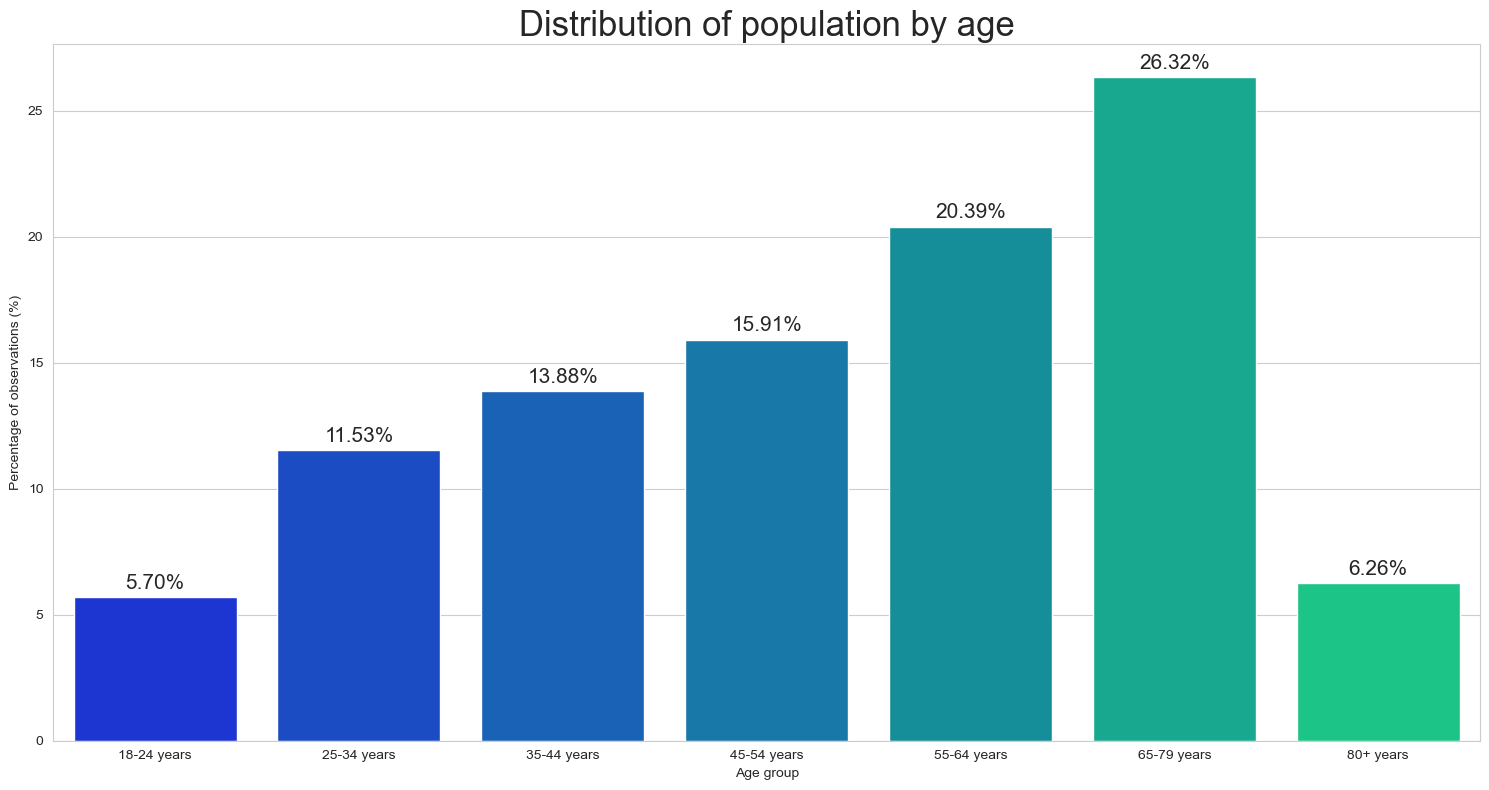

In [356]:
# Reporting of population age in the dataset

total = len(df_prepared_final)
age_percentage = (df_prepared_final['age'].value_counts() / total) * 100
age_percentage = age_percentage.sort_values(ascending = False)
age_order = ['18-24 years', '25-34 years', '35-44 years', '45-54 years', '55-64 years', '65-79 years', '80+ years']

plt.figure(figsize=(15, 8))

barplot1 = sns.barplot(x=age_percentage.index, y=age_percentage.values, order=age_order, palette='winter')
plt.title('Distribution of population by age', fontsize=25)
plt.xlabel('Age group')
plt.ylabel('Percentage of observations (%)')
plt.tight_layout()

for p in barplot1.patches:
    height = p.get_height()
    barplot1.annotate(f'{height:.2f}%', 
                     (p.get_x() + p.get_width() / 2., height),
                     ha='center', va='center',
                     xytext=(0, 10),
                     textcoords='offset points',
                     fontsize=15)

plt.show()

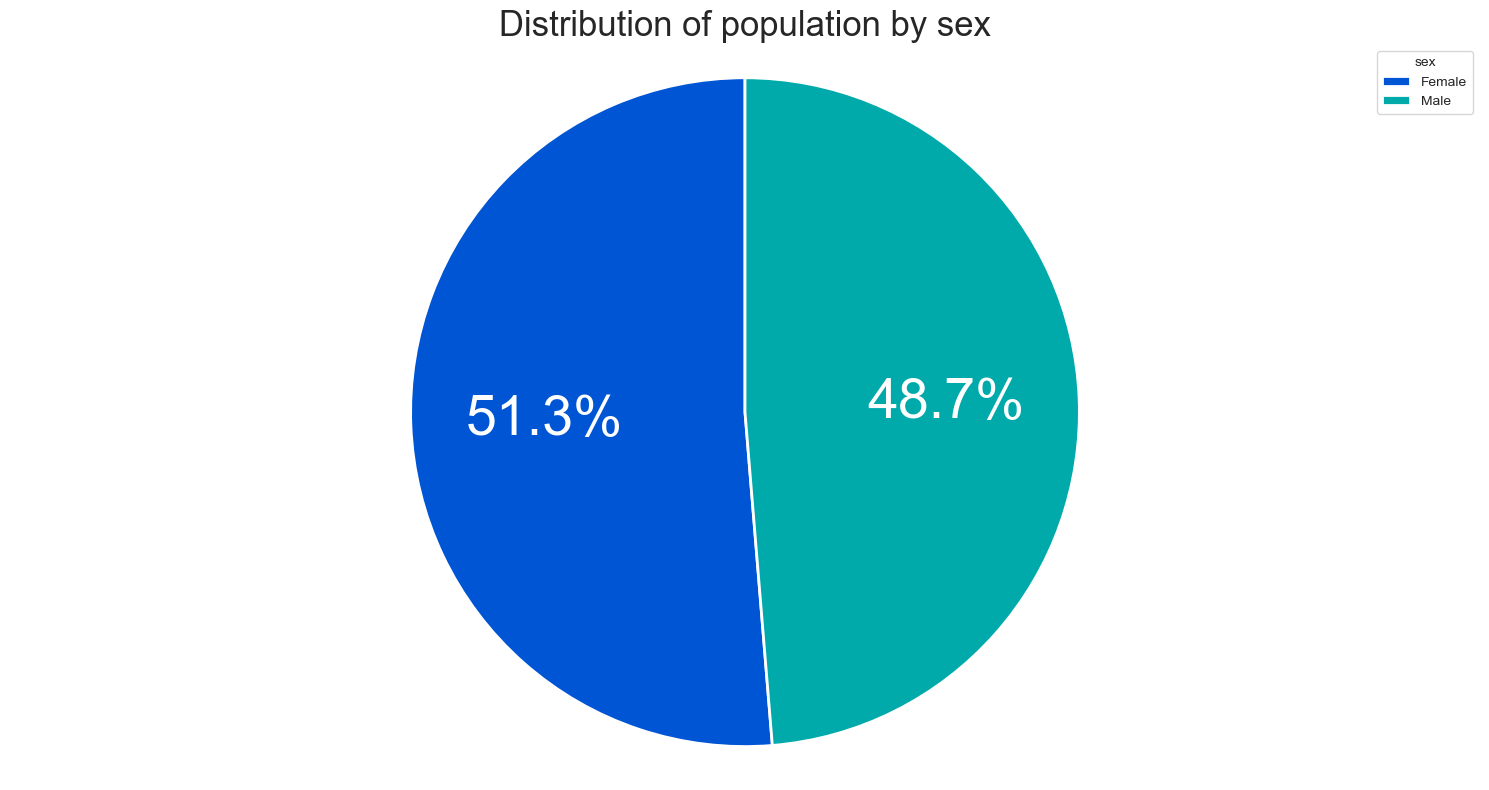

In [357]:
# Reporting of population sex in the dataset

sex_count = df_prepared_final['sex'].value_counts()
sex_count = sex_count.sort_values(ascending = False)
n_colors = len(sex_count)
palette = sns.color_palette("winter", n_colors)

plt.figure(figsize = (15, 8))
plt.pie(sex_count, labels = sex_count.index, autopct = '%1.1f%%', startangle = 90, colors = palette, 
        textprops={'color': 'white', 'fontsize' : 40}, wedgeprops={'linewidth': 2, 'edgecolor': 'white'})
plt.axis('equal')
plt.title('Distribution of population by sex', fontsize = 25)
plt.legend(title = 'sex')
plt.tight_layout()
plt.show()

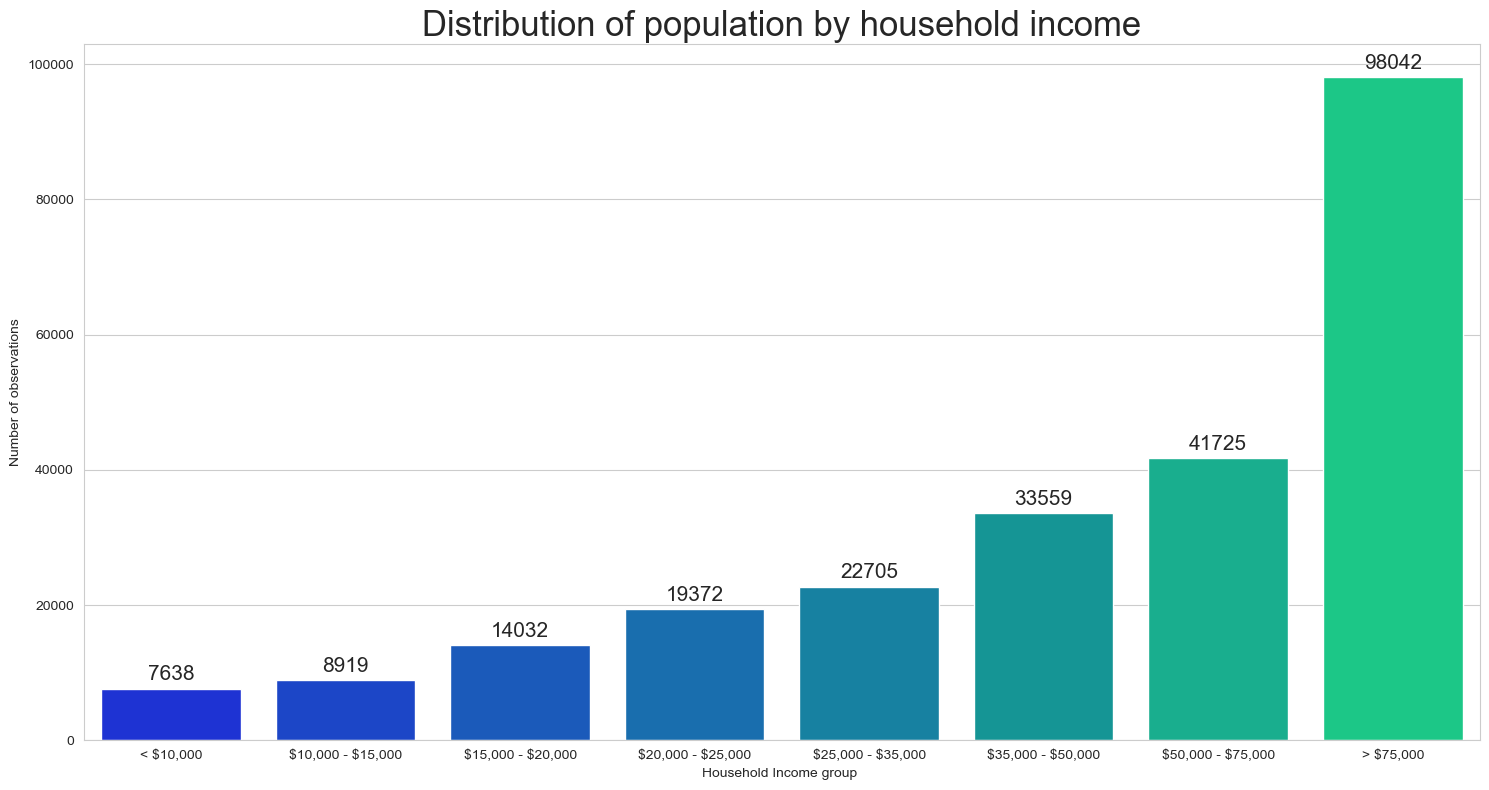

In [358]:
# Reporting of population household income in the dataset

household_income_count = df_prepared_final['household_income'].value_counts()
household_income_count = household_income_count.sort_values(ascending = False)
income_order = ['< \$10,000', '\$10,000 - \$15,000', '\$15,000 - \$20,000', '\$20,000 - \$25,000', '\$25,000 - \$35,000', '\$35,000 - \$50,000', '\$50,000 - \$75,000', '> \$75,000']


plt.figure(figsize = (15, 8))
barplot2 = sns.countplot(x = df_prepared_final['household_income'], order = income_order, data = df_prepared_final, palette='winter')
plt.title('Distribution of population by household income', fontsize = 25)
plt.xlabel('Household Income group ')
plt.ylabel('Number of observations')
plt.tight_layout()

for p in barplot2.patches:
    barplot2.annotate(format(int(p.get_height())),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha = 'center', va = 'center',
                     xytext = (0, 10),
                     textcoords = 'offset points',
                     fontsize = 15)

plt.show()

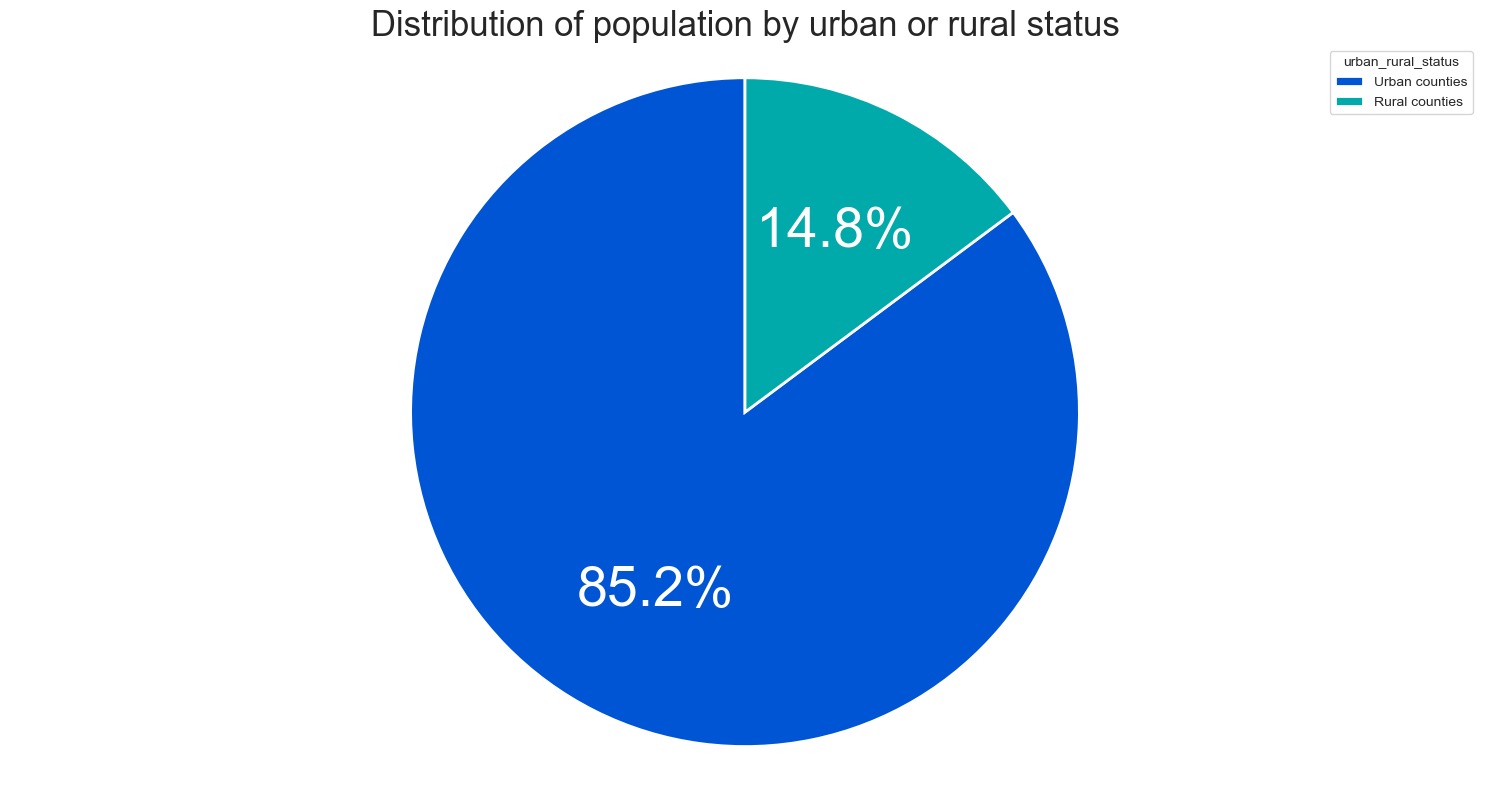

In [359]:
# Reporting of population urban rural status in the dataset

urban_rural_status_count = df_prepared_final['urban_rural_status'].value_counts()
urban_rural_status_count = urban_rural_status_count.sort_values(ascending = False)
n_colors = len(urban_rural_status_count)
palette = sns.color_palette("winter", n_colors)

plt.figure(figsize = (15, 8))
plt.pie(urban_rural_status_count, labels = urban_rural_status_count.index, autopct = '%1.1f%%', startangle = 90, colors = palette, 
        textprops = {'color': 'white', 'fontsize' : 40}, wedgeprops = {'linewidth': 2, 'edgecolor': 'white'})
plt.axis('equal')
plt.title('Distribution of population by urban or rural status', fontsize = 25)
plt.legend(title = 'urban_rural_status')
plt.tight_layout()
plt.show()

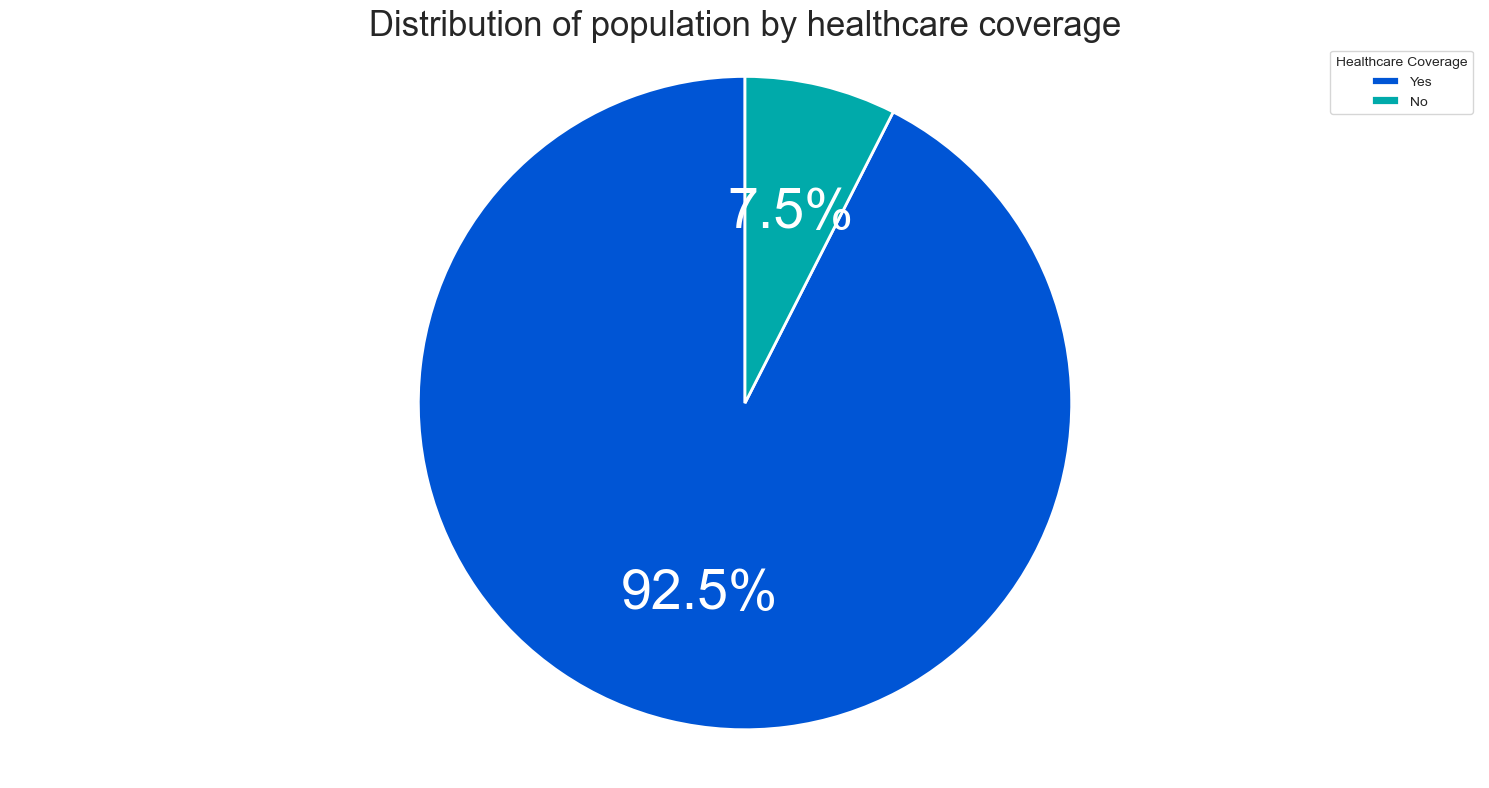

In [360]:
#Reporting of population's health care coverage in the dataset

health_care_count = df_prepared_final['health_care'].value_counts()
health_care_count = health_care_count.sort_values(ascending = False)
n_colors = len(health_care_count)
palette = sns.color_palette("winter", n_colors)

plt.figure(figsize = (15, 8))
plt.pie(health_care_count, labels = health_care_count.index, autopct = '%1.1f%%', startangle = 90, colors = palette, 
        textprops = {'color': 'white', 'fontsize': 40}, wedgeprops = {'linewidth': 2, 'edgecolor': 'white'})
plt.axis('equal')
plt.title('Distribution of population by healthcare coverage', fontsize = 25)
plt.legend(title = 'Healthcare Coverage')
plt.tight_layout()
plt.show()

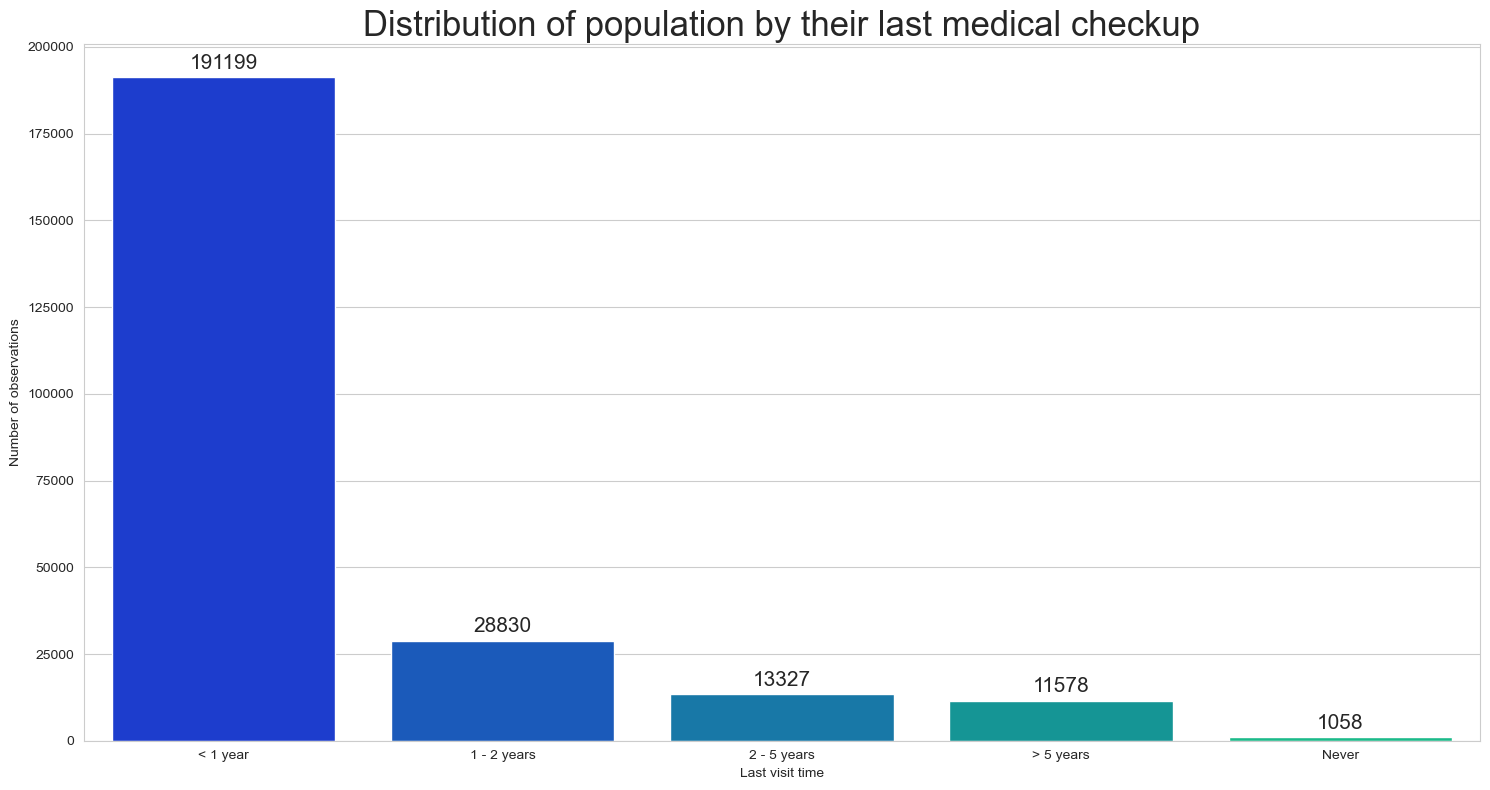

In [361]:
#Reporting of population's last doctor visit in the dataset

doctor_last_visit_counts = df_prepared_final['doctor_last_visit'].value_counts()
doctor_last_visit_counts = doctor_last_visit_counts.sort_values(ascending = False)
n_colors = len(doctor_last_visit_counts)
palette = sns.color_palette("winter", n_colors)

plt.figure(figsize = (15, 8))
barplot3 = sns.countplot(x = df_prepared_final['doctor_last_visit'], order = doctor_last_visit_counts.index, data = df_prepared_final, palette = 'winter')
plt.title('Distribution of population by their last medical checkup', fontsize = 25)
plt.xlabel('Last visit time')
plt.ylabel('Number of observations')
plt.tight_layout()

for p in barplot3.patches:
    barplot3.annotate(format(int(p.get_height())),
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha = 'center', va = 'center',
                      xytext = (0, 10),
                      textcoords = 'offset points', 
                      fontsize = 15)

plt.show()

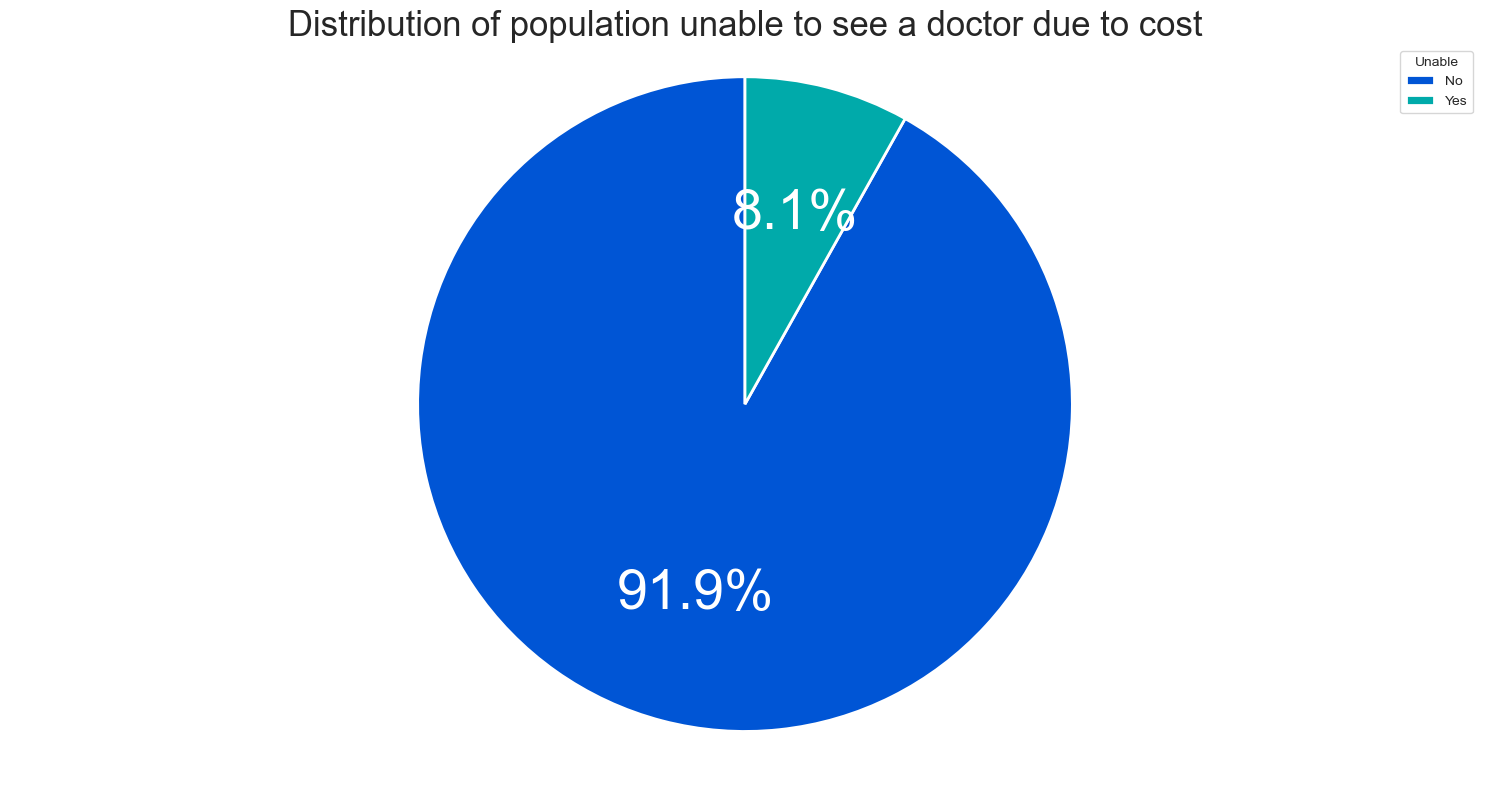

In [362]:
#Reporting of population's unable to see a doctor due to cost in the dataset

medical_cost_count = df_prepared_final['medical_cost'].value_counts()
medical_cost_count = medical_cost_count.sort_values(ascending = False)
n_colors = len(medical_cost_count)
palette = sns.color_palette("winter", n_colors)

plt.figure(figsize = (15, 8))
plt.pie(medical_cost_count, labels = medical_cost_count.index, autopct = '%1.1f%%', startangle = 90, colors = palette,
        textprops = {'color': 'white', 'fontsize': 40}, wedgeprops = {'linewidth': 2, 'edgecolor': 'white'})
plt.axis('equal')
plt.title('Distribution of population unable to see a doctor due to cost', fontsize = 25)
plt.legend(title = 'Unable')
plt.tight_layout()
plt.show()

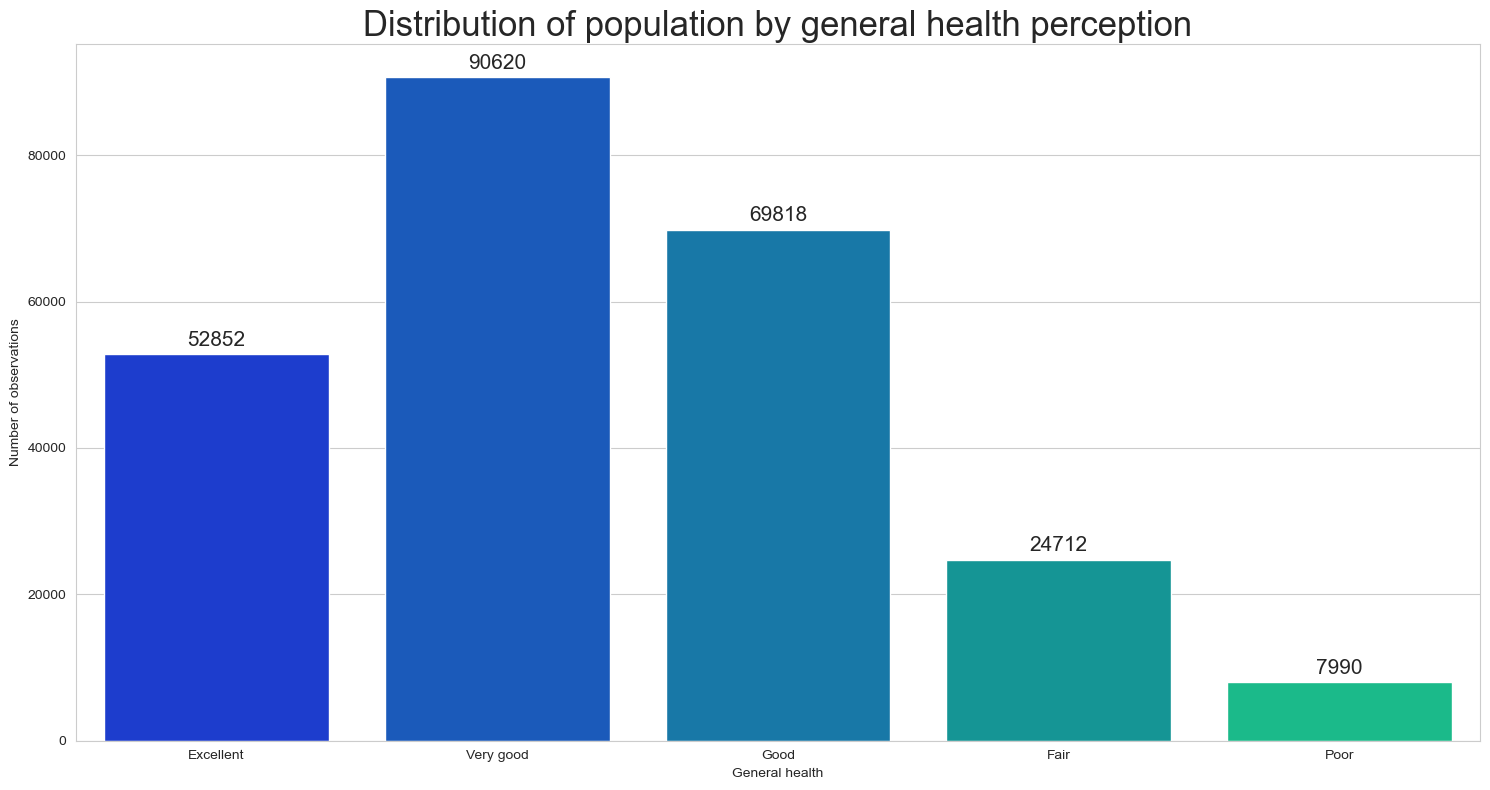

In [363]:
# Reporting of Population's general health perception in the dataset

general_health_order = ['Excellent', 'Very good', 'Good', 'Fair', 'Poor']

plt.figure(figsize = (15, 8))
barplot4 = sns.countplot(x = df_prepared_final['general_health'], order = general_health_order, data = df_prepared_final, palette = 'winter')
plt.title('Distribution of population by general health perception', fontsize = 25)
plt.xlabel('General health')
plt.ylabel('Number of observations')
plt.tight_layout()

for p in barplot4.patches:
    barplot4.annotate(format(int(p.get_height())),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha = 'center', va = 'center',
                     xytext = (0, 10),
                     textcoords = 'offset points',
                     fontsize = 15)

plt.show()

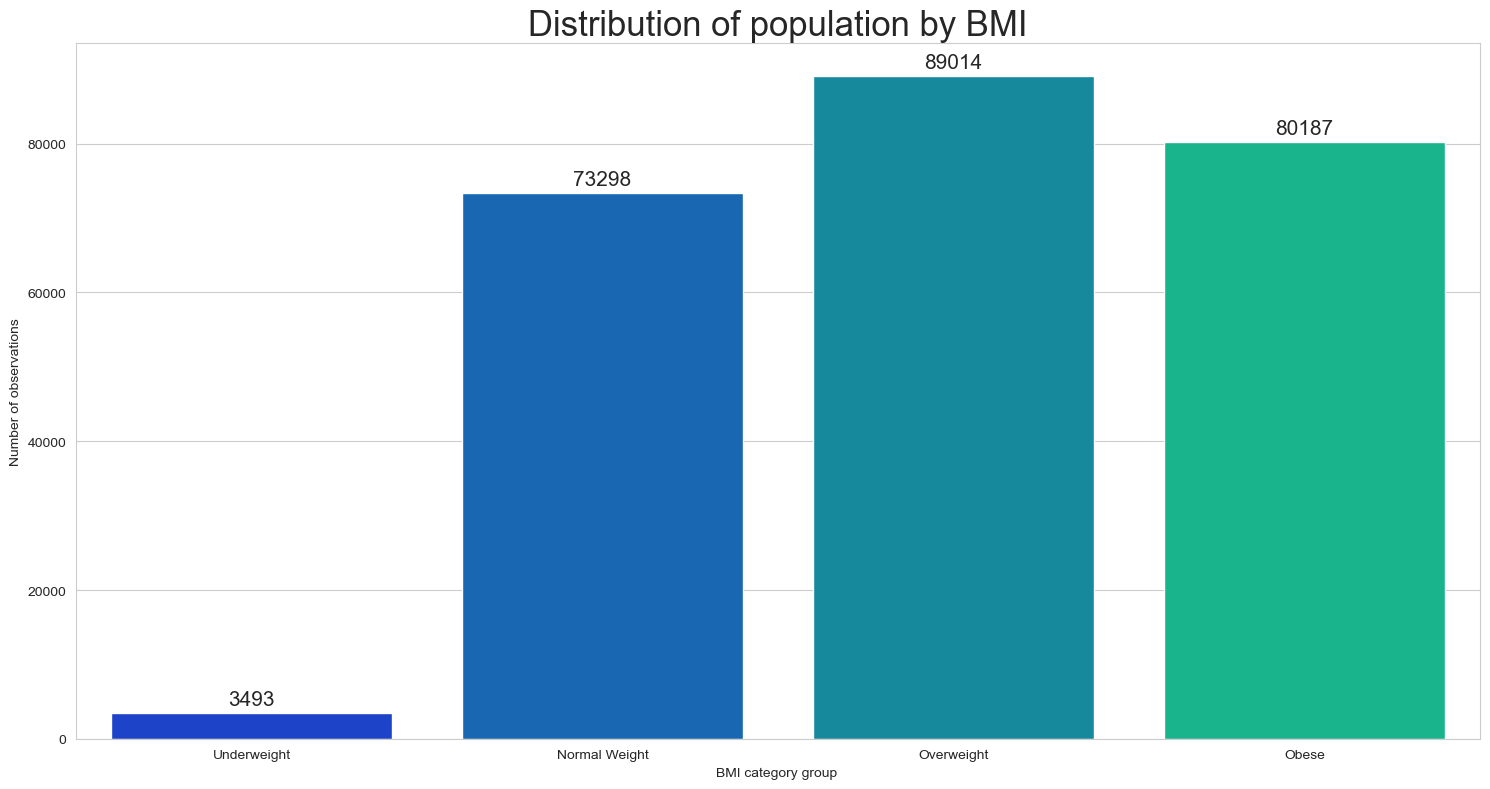

In [364]:
# Reporting of population BMI category in the dataset

bmi_order = ['Underweight', 'Normal Weight', 'Overweight', 'Obese']

plt.figure(figsize = (15, 8))
barplot5 = sns.countplot(x = df_prepared_final['bmi_category'], order = bmi_order, data = df_prepared_final, palette = 'winter')
plt.title('Distribution of population by BMI', fontsize = 25)
plt.xlabel('BMI category group ')
plt.ylabel('Number of observations')
plt.tight_layout()

for p in barplot5.patches:
    barplot5.annotate(format(int(p.get_height())),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha = 'center', va = 'center',
                     xytext = (0, 10),
                     textcoords = 'offset points',
                     fontsize = 15)

plt.show()

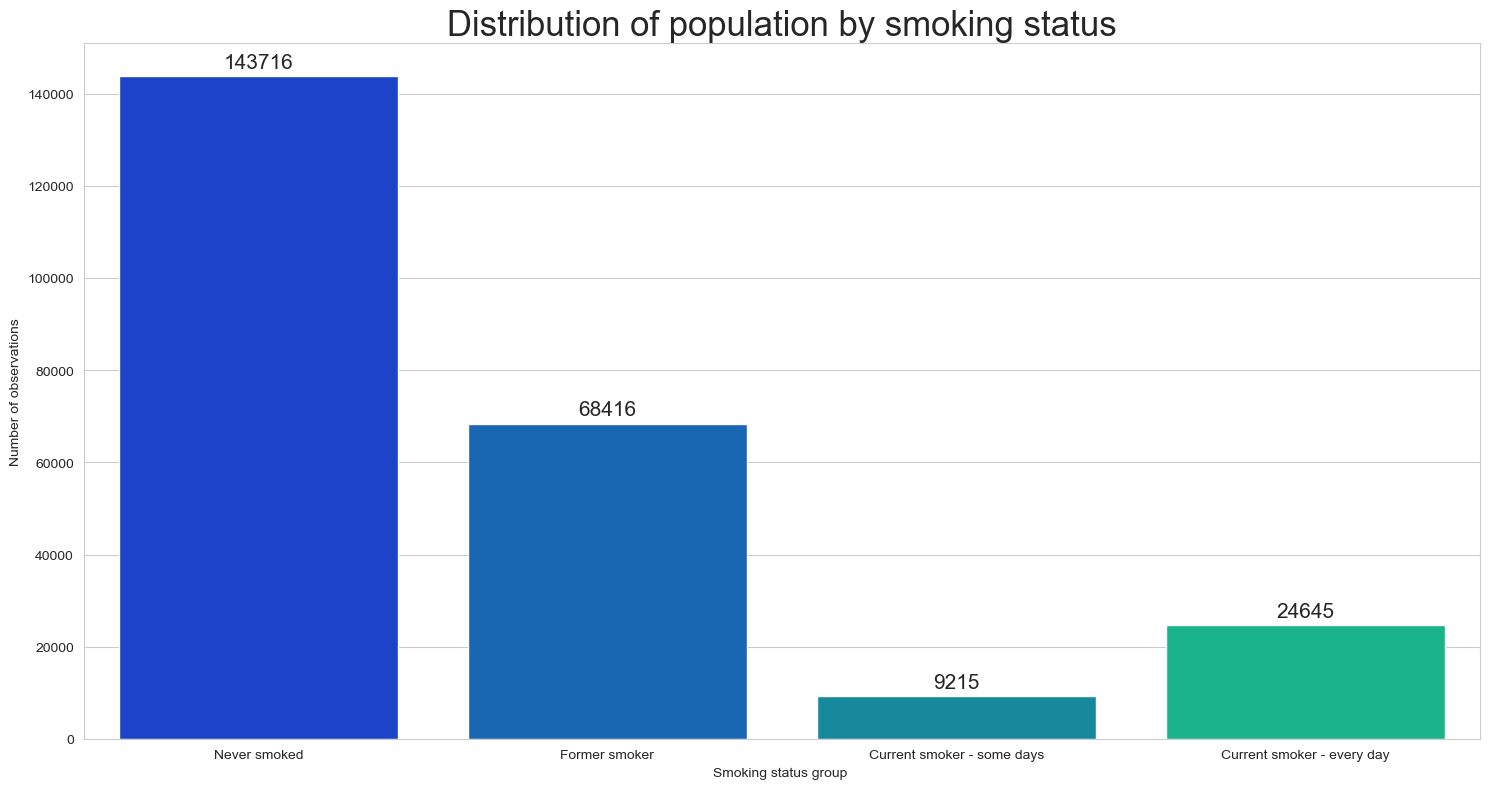

In [365]:
# Reporting of population smoking status in the dataset

smoker_order = ['Never smoked', 'Former smoker', 'Current smoker - some days', 'Current smoker - every day']

plt.figure(figsize = (15, 8))
barplot6 = sns.countplot(x = df_prepared_final['smoking_status'], order = smoker_order, data = df_prepared_final, palette = 'winter')
plt.title('Distribution of population by smoking status', fontsize = 25)
plt.xlabel('Smoking status group ')
plt.ylabel('Number of observations')
plt.tight_layout()

for p in barplot6.patches:
    barplot6.annotate(format(int(p.get_height())),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha = 'center', va = 'center',
                     xytext = (0, 10),
                     textcoords = 'offset points',
                     fontsize = 15)

plt.show()

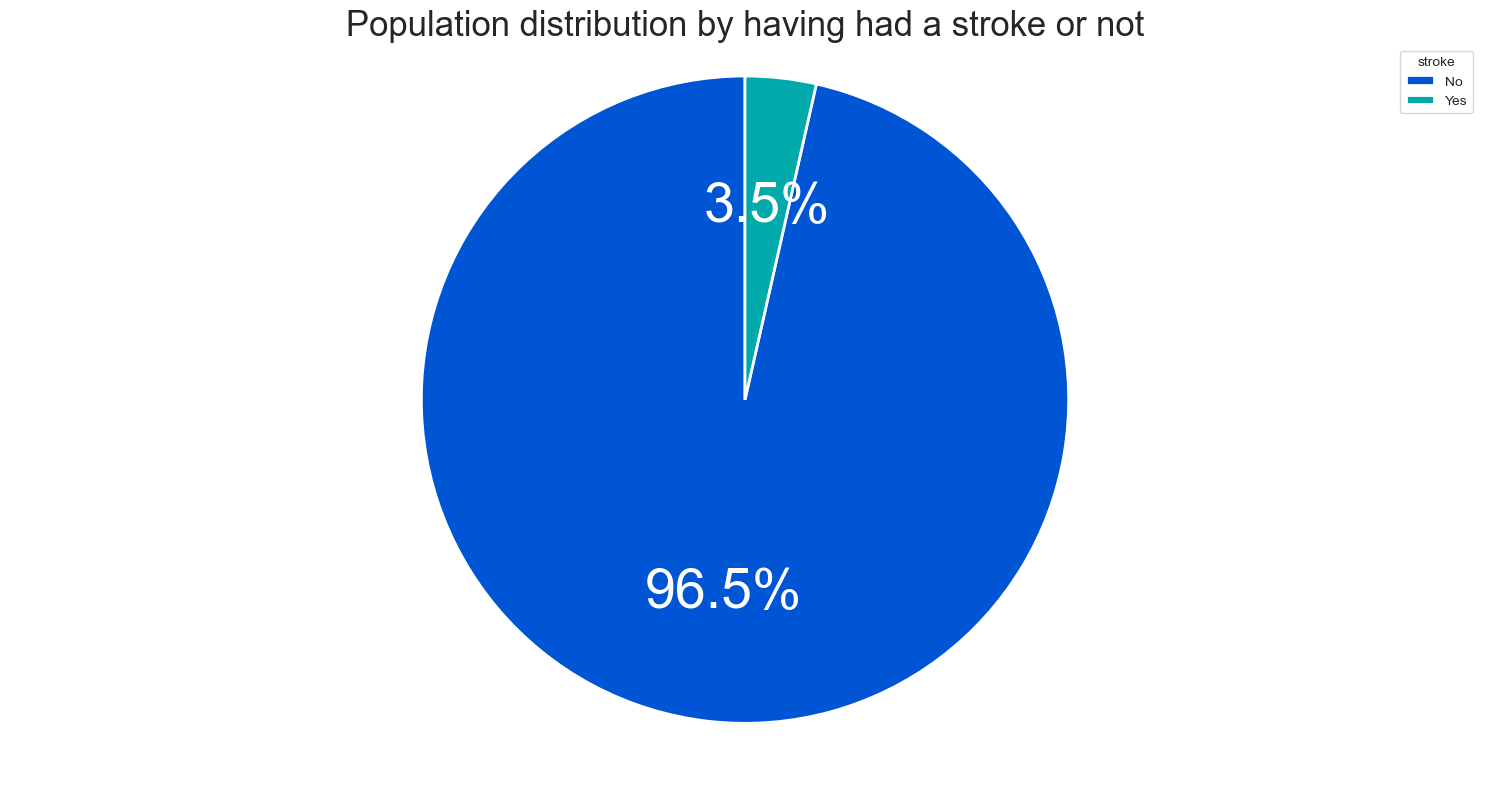

In [367]:
# Reporting of population stroke in the dataset

stroke_count= df_prepared_final['stroke'].value_counts()
stroke_count = stroke_count.sort_values(ascending = False)
n_colors = len(stroke_count)
palette = sns.color_palette("winter", n_colors)

plt.figure(figsize = (15, 8))
plt.pie(stroke_count, labels = stroke_count.index, autopct = '%1.1f%%', startangle = 90, colors = palette,  textprops = {'color': 'white', 'fontsize' : 40}, 
        wedgeprops = {'linewidth': 2, 'edgecolor': 'white'})
plt.axis('equal')
plt.title("Population distribution by having had a stroke or not", fontsize = 25)
plt.legend(title = 'stroke')
plt.tight_layout()
plt.show()

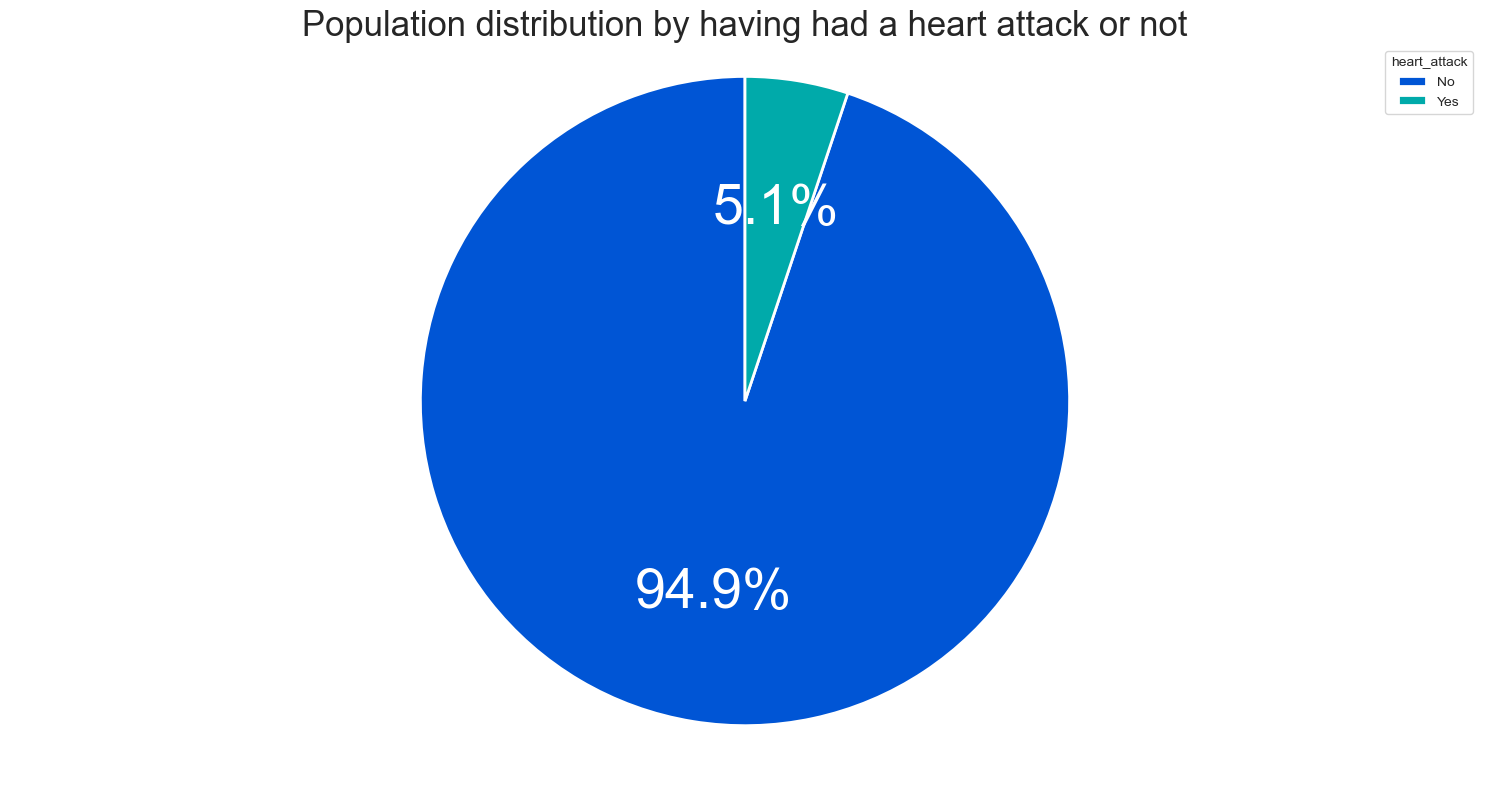

In [368]:
# Reporting of population heart attack in the dataset

stroke_count= df_prepared_final['heart_attack'].value_counts()
stroke_count = stroke_count.sort_values(ascending = False)
n_colors = len(stroke_count)
palette = sns.color_palette("winter", n_colors)

plt.figure(figsize=(15, 8))
plt.pie(stroke_count, labels = stroke_count.index, autopct = '%1.1f%%', startangle = 90, colors = palette,  textprops = {'color': 'white', 'fontsize' : 40}, 
        wedgeprops = {'linewidth': 2, 'edgecolor': 'white'})
plt.axis('equal')
plt.title('Population distribution by having had a heart attack or not', fontsize = 25)
plt.legend(title = 'heart_attack')
plt.tight_layout()
plt.show()

### 5. Bivariate Analysis

In this section, we explore the relationships between pairs of variables within the dataset.

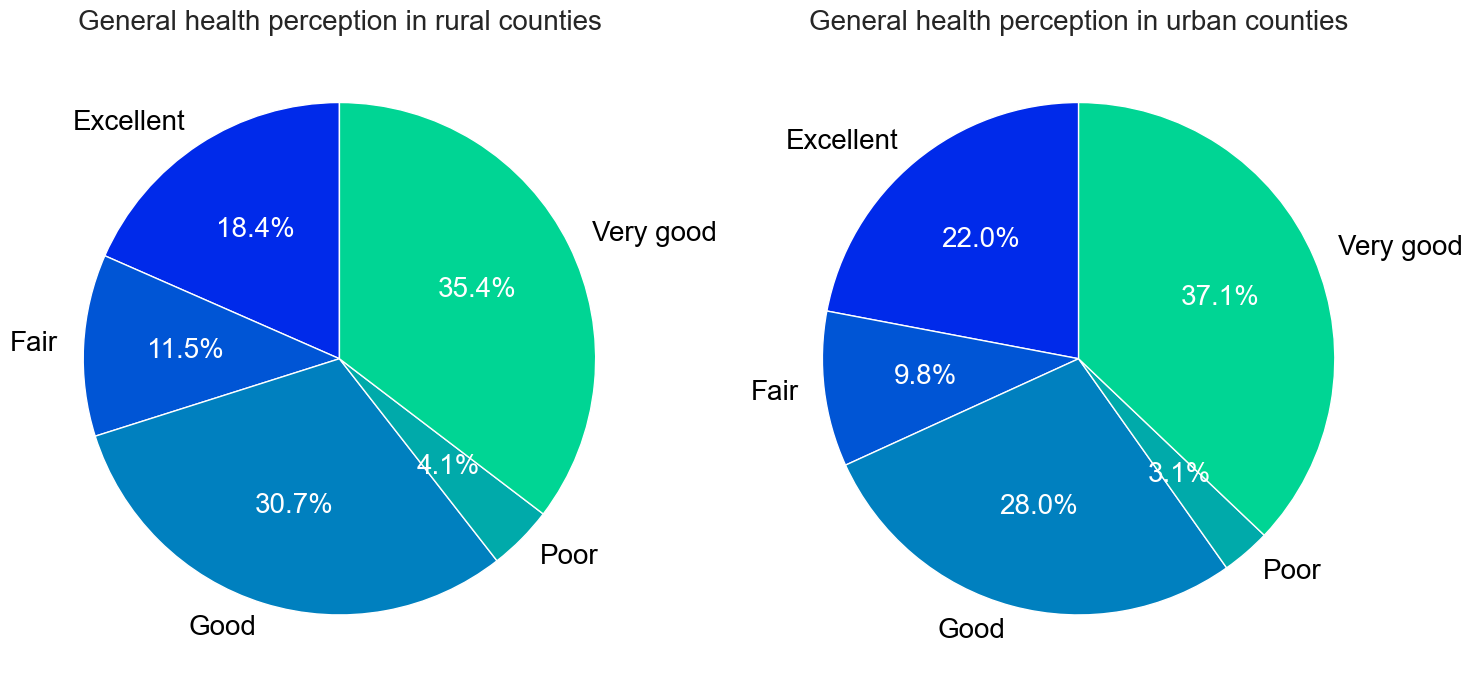

In [369]:
# Create the cross-tabulation to get the total count of people in each group

crosstab_data_urban_health = pd.crosstab(df_prepared_final['urban_rural_status'], df_prepared_final['general_health'])
crosstab_percentages = crosstab_data_urban_health.div(crosstab_data_urban_health.sum(axis = 1), axis = 0) * 100

# Reorder the DataFrame and filter data for each county type

rural_data = crosstab_percentages.loc['Rural counties']
urban_data = crosstab_percentages.loc['Urban counties']

# Generate the pie charts

fig, axes = plt.subplots(1, 2, figsize=(15, 8))
for ax, data, title in zip(axes, [rural_data, urban_data], ['General health perception in rural counties', 'General health perception in urban counties']):

    # Generate the pie chart and capture the wedge, text and autotext objects

    wedges, texts, autotexts = ax.pie(data, labels = data.index, autopct = '%1.1f%%', startangle = 90, colors = sns.color_palette('winter', len(data.index)), 
                                      textprops={'color': 'black', 'fontsize': 20}, wedgeprops={'linewidth': 1, 'edgecolor': 'white'})
    
    # Update the color of the percentage texts

    for autotext in autotexts:
        autotext.set_color('white')
    
    # Set the title with customized font size

    ax.set_title(title, fontsize = 20)

# Display the pie charts

plt.tight_layout()
plt.show()


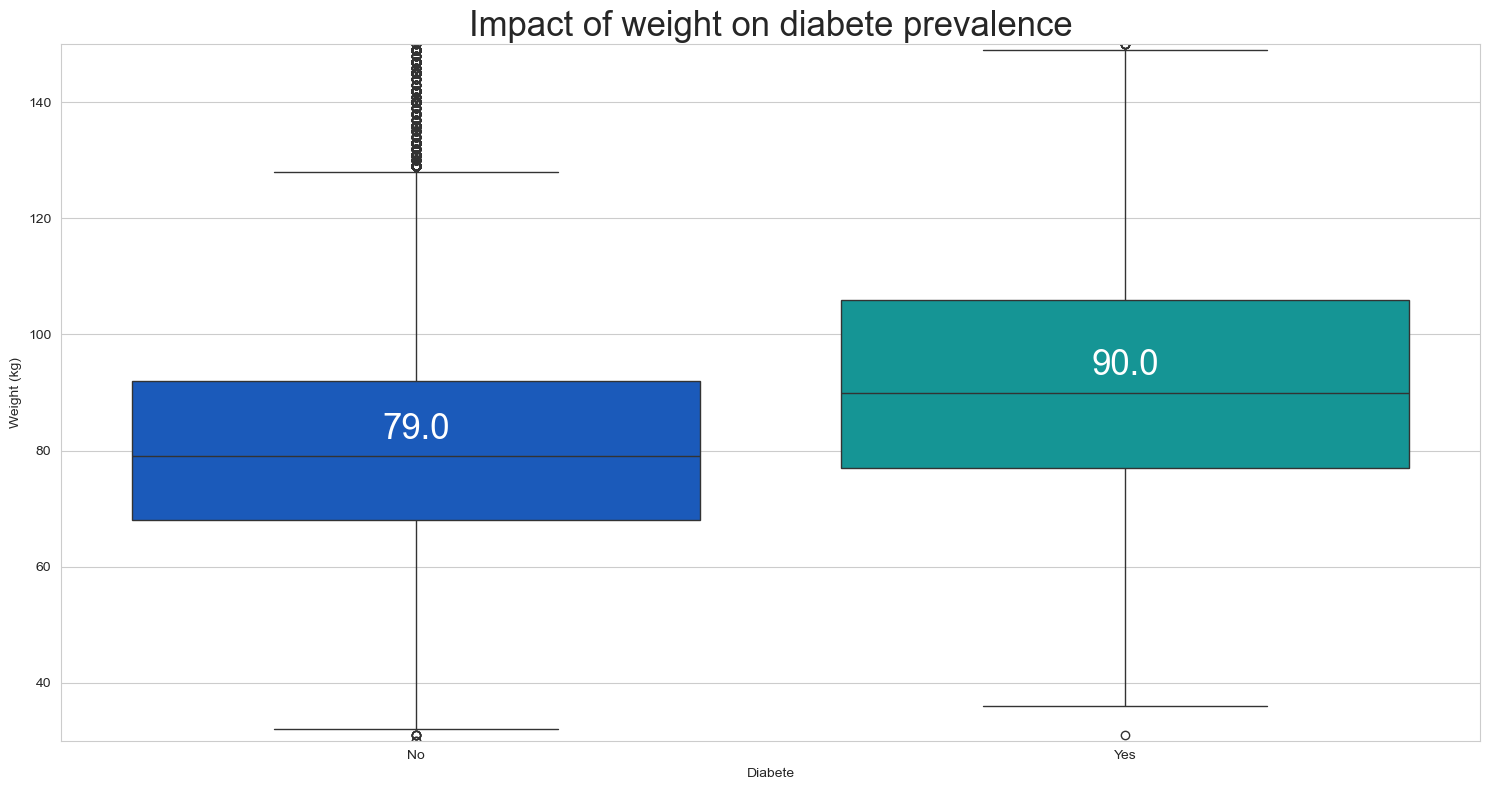

In [370]:
# Relationship between diabete and weight

median_weights = df_prepared_final.groupby("diabete")["weight"].median()

plt.figure(figsize = (15, 8))
sns.boxplot(x = "diabete", y = "weight", data = df_prepared_final, palette = 'winter')
plt.title("Impact of weight on diabete prevalence", fontsize = 25)
plt.xlabel("Diabete")
plt.ylabel("Weight (kg)")
plt.ylim(30, 150)

for i, med in enumerate(median_weights):
    plt.annotate(f"{med}", xy = (i, med), xytext = (i, med + 3), fontsize = 25, ha = 'center', color = 'white')

plt.tight_layout()
plt.show()


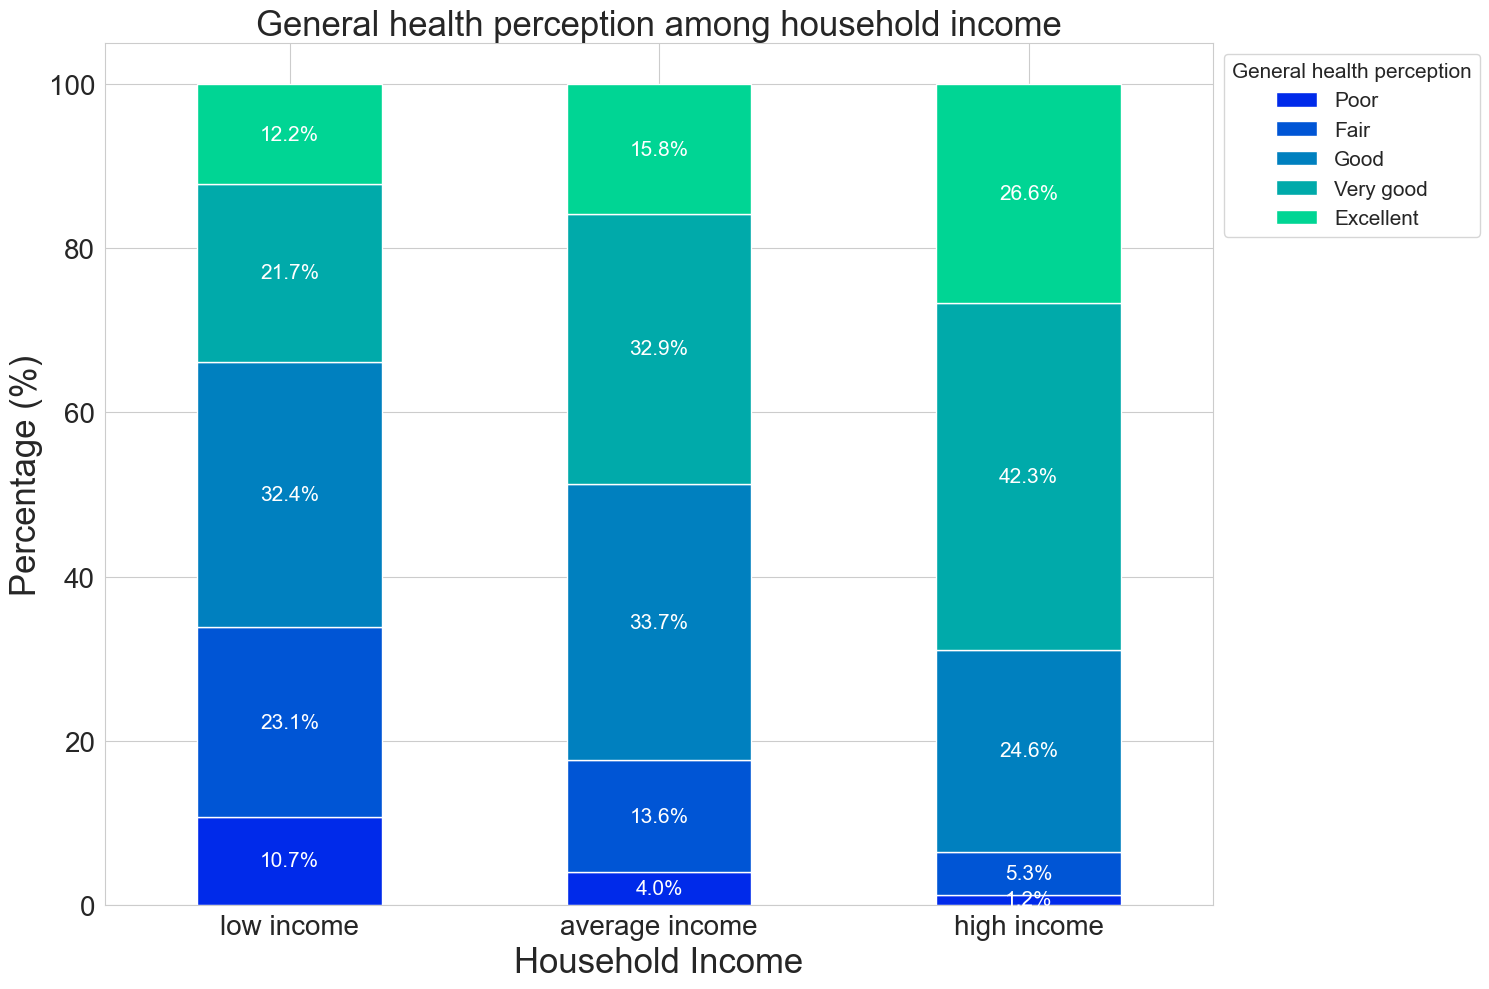

In [371]:
# Modification of the household income variable
def income_cat(household_income):
    if household_income in ['\$50,000 - \$75,000', '> \$75,000']:
        return "high income"
    elif household_income in ['\$20,000 - \$25,000', '\$25,000 - \$35,000', '\$35,000 - \$50,000']:
        return "average income"
    elif household_income in ['< \$10,000', '\$10,000 - \$15,000', '\$15,000 - \$20,000']:
        return "low income"

df_prepared_final['category_income'] = df_prepared_final['household_income'].apply(income_cat)

# Create the cross-tabulation to get the total count of people in each income group
category_order = ['low income', 'average income', 'high income']
crosstab_data_income_health = pd.crosstab(df_prepared_final['category_income'], df_prepared_final['general_health'])
crosstab_data_income_health = crosstab_data_income_health.reindex(category_order)

# Calculate the percentages for each category in the new cross-tabulation
stacked_data_income = crosstab_data_income_health.div(crosstab_data_income_health.sum(axis = 1), axis = 0) * 100

# Identify missing columns
new_health_order = ['Poor', 'Fair', 'Good', 'Very good', 'Excellent']
missing_columns = set(new_health_order) - set(stacked_data_income.columns)

# Add missing columns with values of 0
for col in missing_columns:
    stacked_data_income[col] = 0

# Reorder the columns based on 'new_health_order'
stacked_data_income_reordered = stacked_data_income[new_health_order]

# Reverse the color palette for the stacked bar chart
palette = sns.color_palette('winter', len(new_health_order))

# Plot the reordered stacked bar chart with reversed color palette
ax = stacked_data_income_reordered.plot(kind='bar', stacked=True, figsize=(15, 10), color=palette)
plt.xlabel('Household Income', fontsize = 25)
plt.ylabel('Percentage (%)', fontsize = 25)
plt.legend(title='General health perception', loc='upper left', bbox_to_anchor=(1.0, 1.0), fontsize=15, title_fontsize=15)
plt.title('General health perception among household income', fontsize=25)
plt.xticks(rotation=0)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

# Add percentage annotations on each bar segment
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    if height != 0:
        ax.annotate(f'{height:.1f}%', (x + width/2, y + height/2), ha='center', va='center', fontsize=15, color='white')

plt.tight_layout()
plt.show()

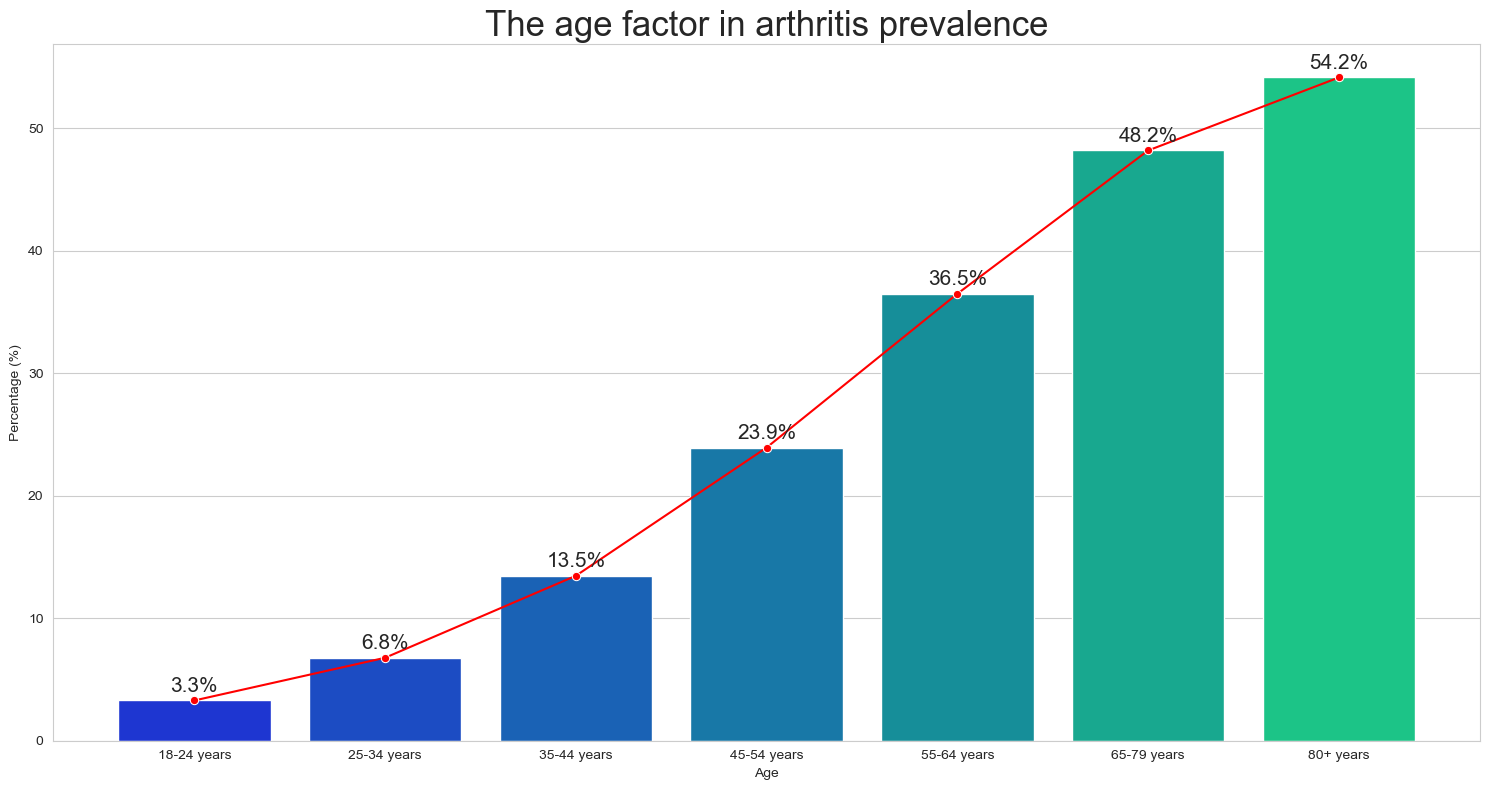

In [372]:
# Create the cross-tabulation to get the total count of people in each age group

crosstab_data_age_arthritis = pd.crosstab(df_prepared_final['age'], df_prepared_final['arthritis'])

# Calculate the percentages for each category in the cross-tabulation

crosstab_percentages_age_arthritis = crosstab_data_age_arthritis.div(crosstab_data_age_arthritis.sum(axis = 1), axis = 0) * 100

# Reorder the DataFrame based on the specified age order

age_order = ['18-24 years', '25-34 years', '35-44 years', '45-54 years', '55-64 years', '65-79 years', '80+ years']
age_colors = sns.color_palette('winter', len(age_order))
crosstab_percentages_age_arthritis = crosstab_percentages_age_arthritis.loc[age_order]

# Plot the bar chart with percentages

plt.figure(figsize = (15, 8))
barplot_age_arthritis = sns.barplot(x = crosstab_percentages_age_arthritis.index, y = 'Yes', data = crosstab_percentages_age_arthritis, palette = age_colors)
plt.title("The age factor in arthritis prevalence", fontsize = 25)
plt.xlabel("Age")
plt.ylabel("Percentage (%)")
plt.tight_layout()

# Add a line plot to represent the percentage of 'Yes' for arthritis in each age group

sns.lineplot(x = crosstab_percentages_age_arthritis.index, y = 'Yes', data = crosstab_percentages_age_arthritis, marker = 'o', color = 'red')

# Annotate the bars with the percentages

for p in barplot_age_arthritis.patches:
    barplot_age_arthritis.annotate(f'{p.get_height():.1f}%',
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha = 'center', va = 'center',
                     xytext = (0, 10),
                     textcoords = 'offset points',
                     fontsize = 15, rotation = 0)

plt.show()


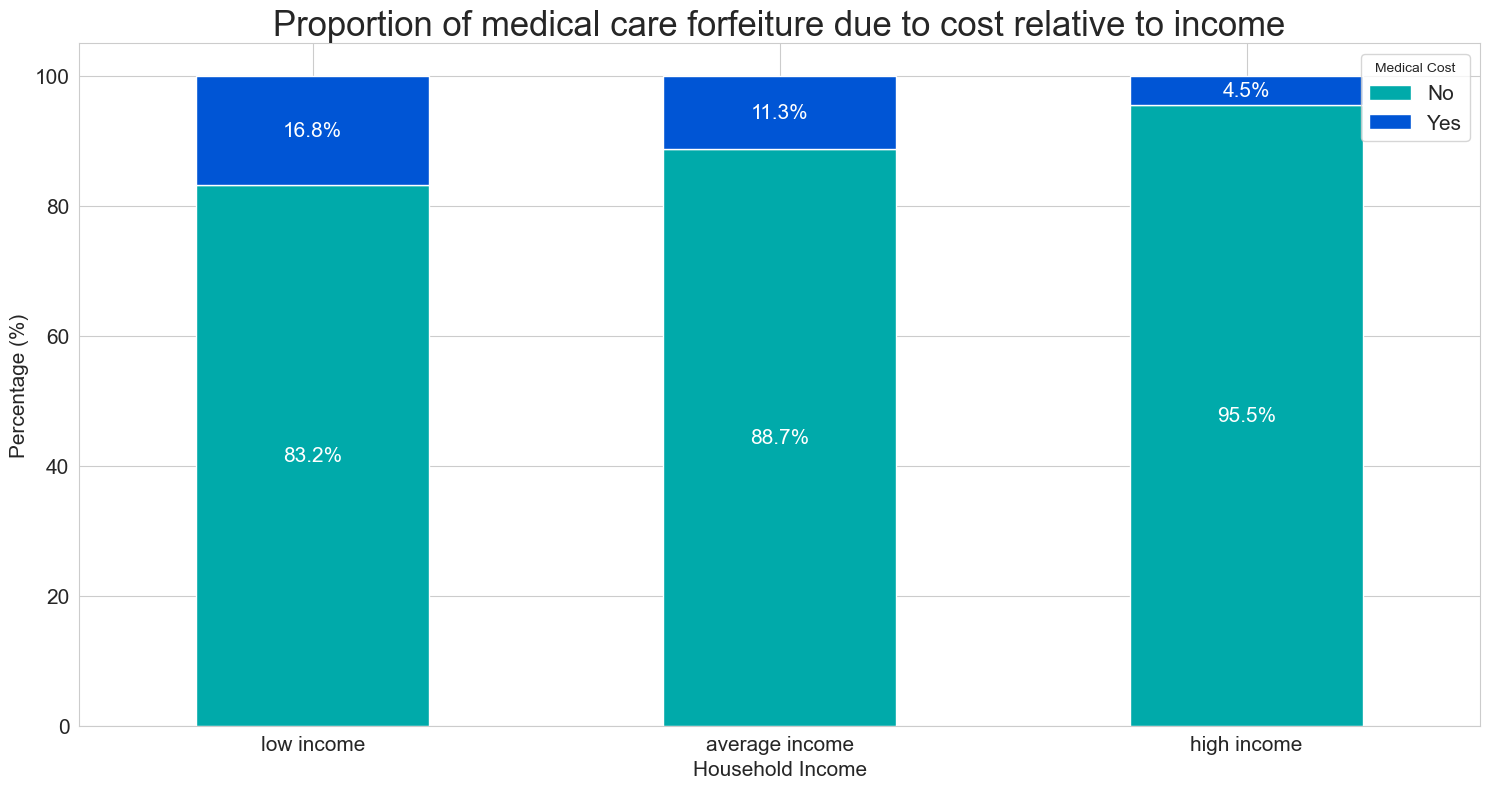

In [373]:
#medical_cost by household_income

# Modification of the household income variable

def income_cat(household_income):
    if household_income in ['\$50,000 - \$75,000', '> \$75,000']:
        return "high income"
    elif household_income in ['\$20,000 - \$25,000', '\$25,000 - \$35,000', '\$35,000 - \$50,000']:
        return "average income"
    elif household_income in ['< \$10,000', '\$10,000 - \$15,000', '\$15,000 - \$20,000']:
        return "low income"

df_prepared_final['category_income'] = df_prepared_final['household_income'].apply(income_cat)

# We order category_income
category_order = ['low income', 'average income', 'high income'] # Création de l'ordre
df_prepared_final['category_income'].astype(pd.CategoricalDtype(categories=category_order, ordered=False)) # Modification de l'ordre dans la colonne category_income

# We create the crosstab for the category_income and medical_cost variables
categoryincome_medical_crosstab = pd.crosstab(df_prepared_final['category_income'], df_prepared_final['medical_cost'], normalize='index') * 100
categoryincome_medical_crosstab = categoryincome_medical_crosstab.reindex(category_order)
# Reverse the color palette for the stacked bar chart
reversed_color_palette = sns.color_palette('winter', len(categoryincome_medical_crosstab.columns))[::-1]

# Plot the reordered stacked bar chart with reversed color palette
ax = categoryincome_medical_crosstab.plot(kind='bar', stacked=True, figsize=(15, 8), color=reversed_color_palette)

# Add labels and title
plt.xlabel('Household Income', fontsize=15)
plt.ylabel('Percentage (%)', fontsize=15)
plt.title('Proportion of medical care forfeiture due to cost relative to income', fontsize=25)
plt.legend(title='Medical Cost', loc='upper right', bbox_to_anchor=(1.0, 1.0), fontsize=15)

# Add percentage annotations on each bar segment
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    if height != 0:  # to avoid annotating empty bars
        ax.annotate(f'{height:.1f}%', (x + width/2, y + height/2), ha='center', va='center', fontsize=15, color='white')
plt.xticks(rotation=0)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.tight_layout()
plt.show()

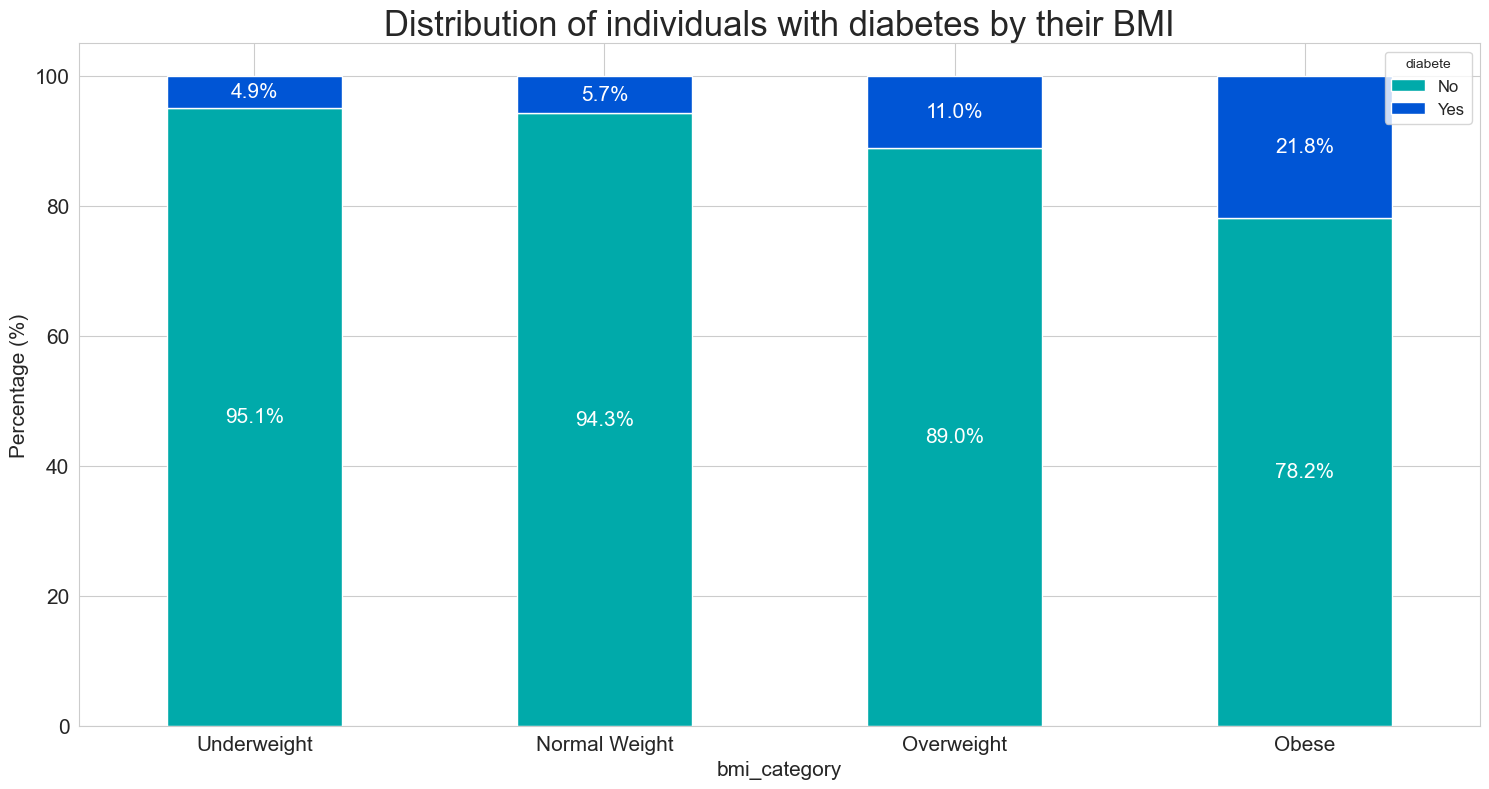

In [374]:
# diabete by bmi_category

# We order bmi_order
bmi_order = ['Underweight', 'Normal Weight', 'Overweight', 'Obese'] # Création de l'ordre
df_prepared_final['bmi_category'].astype(pd.CategoricalDtype(categories=bmi_order, ordered=True)) # Modification de l'ordre dans la colonne category_income

# We create the crosstab for the category_income and medical_cost
bmi_diabete_crosstab = pd.crosstab(df_prepared_final['bmi_category'], df_prepared_final['diabete'], normalize='index') * 100
bmi_diabete_crosstab = bmi_diabete_crosstab.reindex(bmi_order)

# Reverse the color palette for the stacked bar chart
reversed_color_palette = sns.color_palette('winter', len(bmi_diabete_crosstab.columns))[::-1]

# Plot the reordered stacked bar chart with reversed color palette
figure11 = bmi_diabete_crosstab.plot(kind='bar', stacked=True, figsize=(15, 8), color=reversed_color_palette)

# Add labels and title
plt.xlabel('bmi_category', fontsize=15)
plt.ylabel('Percentage (%)', fontsize=15)
plt.title('Distribution of individuals with diabetes by their BMI', fontsize=25)

# Add percentage annotations on each bar segment
for p in figure11.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    if height != 0:  # to avoid annotating empty bars
        figure11.annotate(f'{height:.1f}%', (x + width/2, y + height/2), ha='center', va='center', fontsize=15, color='white')
plt.legend(title='diabete', loc='upper right', bbox_to_anchor=(1.0, 1.0), fontsize=12)
plt.xticks(rotation=0)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.tight_layout()
plt.show()

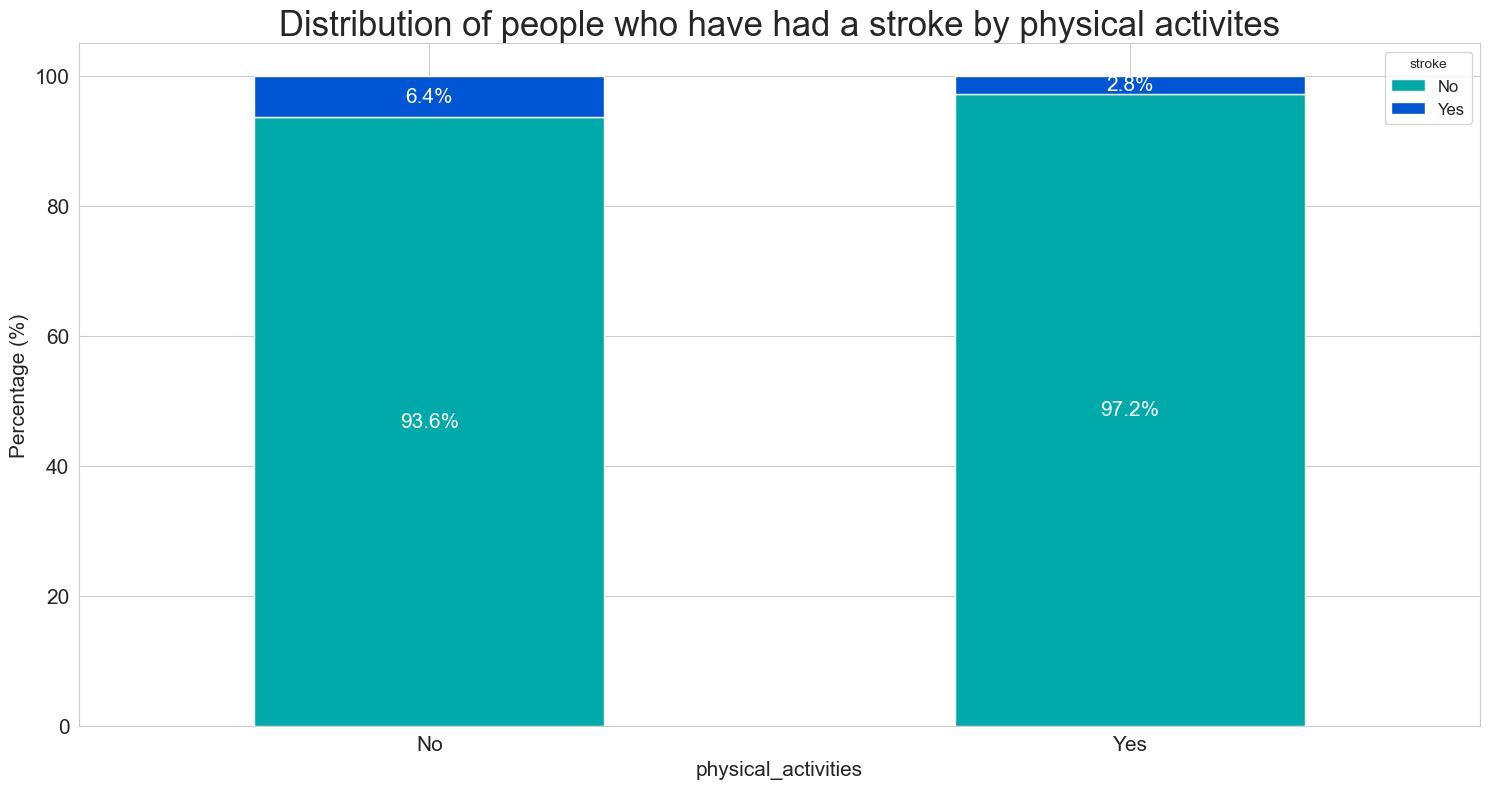

In [375]:
# stroke by physical_activities

# We create the crosstab for the physical_activities and stroke
physicalact_stroke_crosstab = pd.crosstab(df_prepared_final['physical_activities'], df_prepared_final['stroke'], normalize='index') * 100

# Reverse the color palette for the stacked bar chart
reversed_color_palette = sns.color_palette('winter', len(physicalact_stroke_crosstab.columns))[::-1]

# Plot the reordered stacked bar chart with reversed color palette
figure12 = physicalact_stroke_crosstab.plot(kind='bar', stacked=True, figsize=(15, 8), color=reversed_color_palette)

# Add labels and title
plt.xlabel('physical_activities', fontsize=15)
plt.ylabel('Percentage (%)', fontsize=15)
plt.title('Distribution of people who have had a stroke by physical activites', fontsize=25)

# Add percentage annotations on each bar segment
for p in figure12.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    if height != 0:  # to avoid annotating empty bars
        figure12.annotate(f'{height:.1f}%', (x + width/2, y + height/2), ha='center', va='center', fontsize=15, color='white')
plt.legend(title='stroke', loc='upper right', bbox_to_anchor=(1.0, 1.0), fontsize=12)
plt.xticks(rotation=0)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.tight_layout()
plt.show()

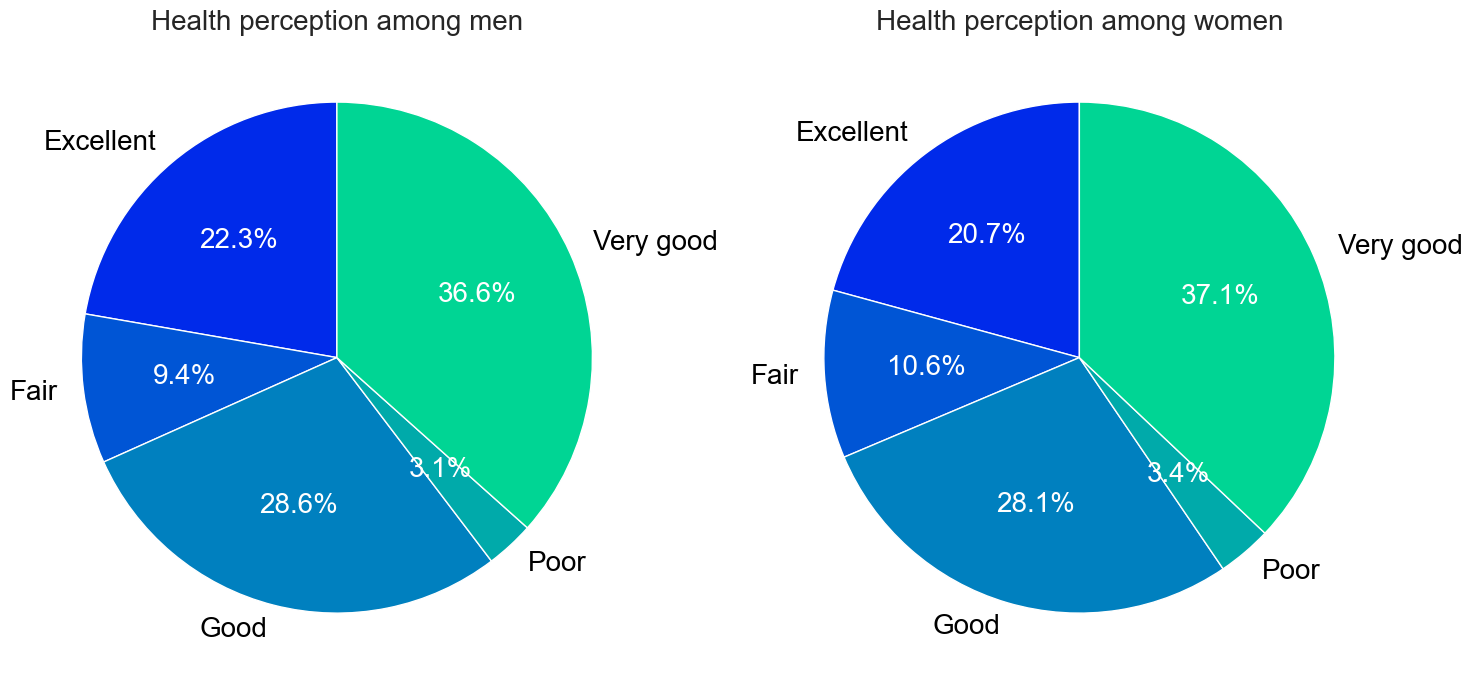

In [376]:
# Comparison of health perception between men and women/diagram
crosstab_data_gender_health = pd.crosstab(df_prepared_final['sex'], df_prepared_final['general_health'])
crosstab_percentages = crosstab_data_gender_health.div(crosstab_data_gender_health.sum(axis=1), axis=0) * 100

male_data = crosstab_percentages.loc['Male']
female_data = crosstab_percentages.loc['Female']

fig, axes = plt.subplots(1, 2, figsize=(15, 8))
colors = sns.color_palette("winter", n_colors=len(crosstab_percentages.columns))

for ax, data, title in zip(axes, [male_data, female_data], ['Health perception among men', 'Health perception among women']):
    wedges, texts, autotexts = ax.pie(data, labels=data.index, autopct='%1.1f%%', startangle=90,
                                      colors=colors, textprops={'color': 'black', 'fontsize': 20},
                                      wedgeprops={'linewidth': 1, 'edgecolor': 'white'})

    for autotext in autotexts:
        autotext.set_color('white')

    ax.set_title(title, fontsize=20)

plt.tight_layout()
plt.show()

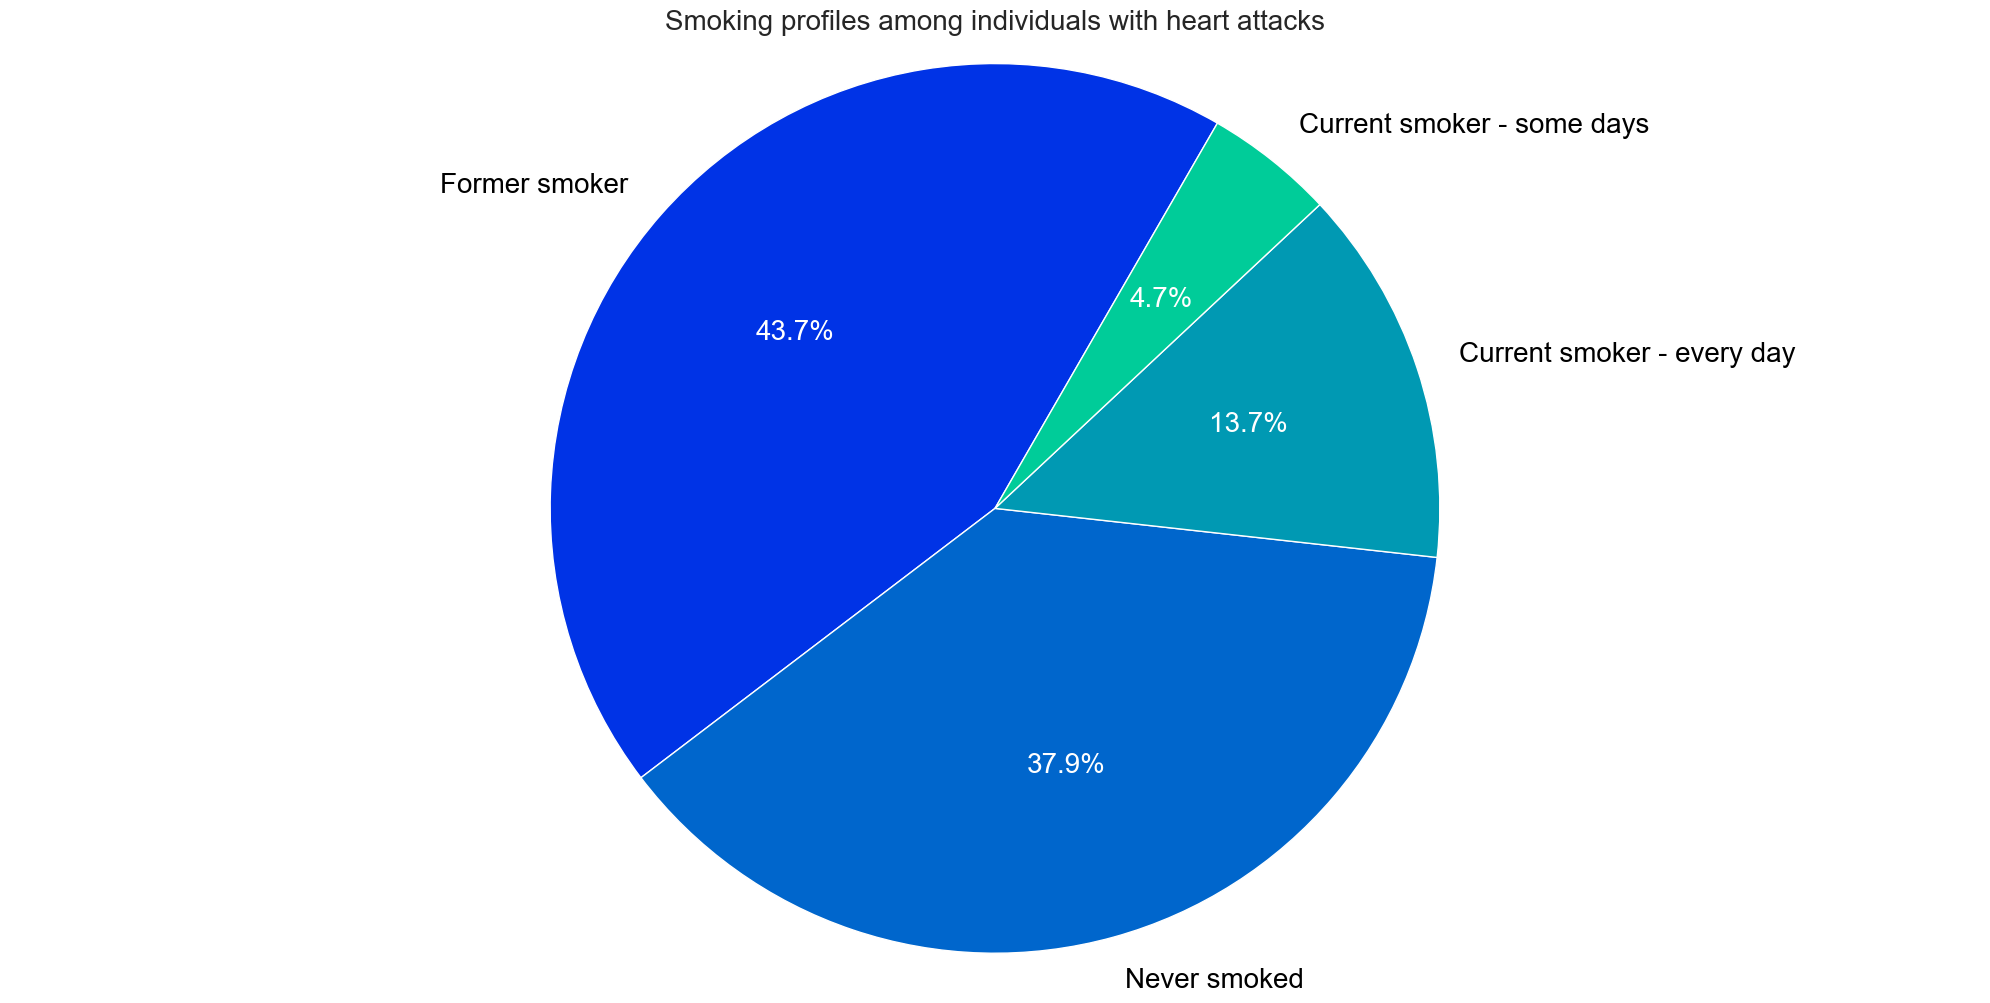

In [377]:
#Smoking profiles among individuals with heart attacks

data_subset = df_prepared_final[['smoking_status', 'heart_attack']]

heart_attack_counts = data_subset[data_subset['heart_attack'] == 'Yes']['smoking_status'].value_counts()

plt.figure(figsize=(20, 10))

colors = sns.color_palette('winter', n_colors=len(heart_attack_counts))

_, texts, autotexts = plt.pie(heart_attack_counts, labels=heart_attack_counts.index, autopct='%1.1f%%', startangle=60, colors=colors,
                               textprops={'color': 'black', 'fontsize': 20},
                              wedgeprops={'linewidth': 1, 'edgecolor': 'white'})

for autotext in autotexts:
    autotext.set_color('white')

plt.title("Smoking profiles among individuals with heart attacks", fontsize=20)
plt.axis('equal')
plt.tight_layout()
plt.show()

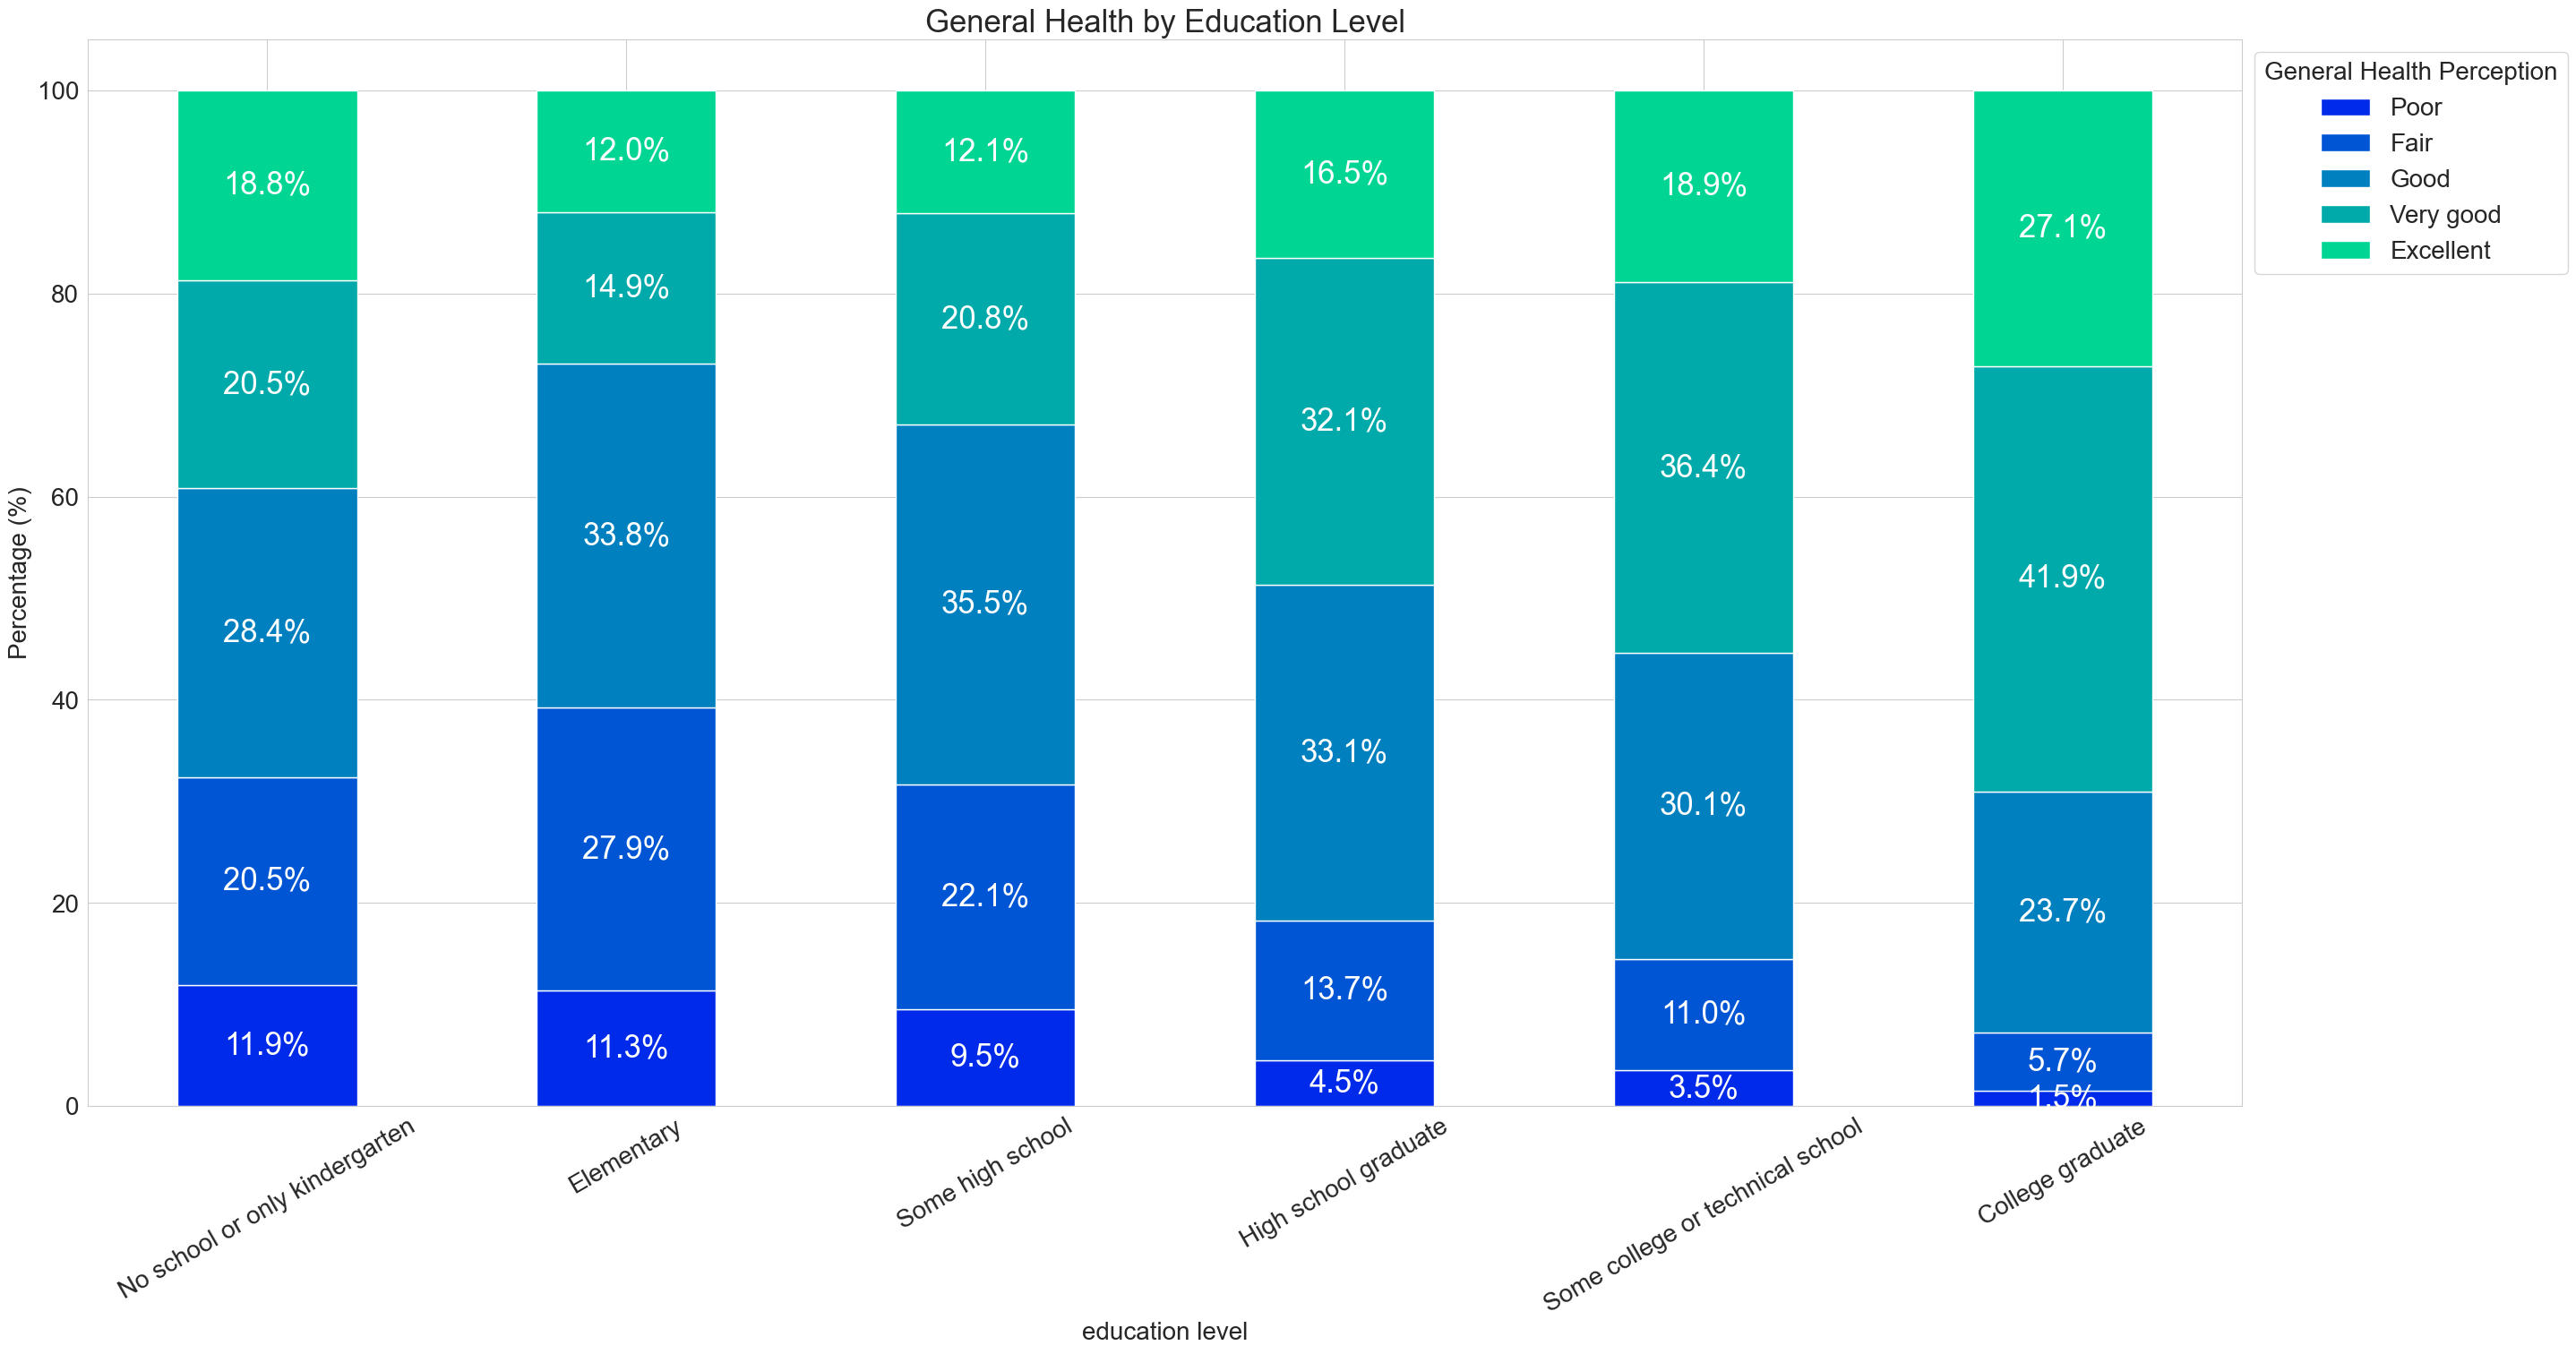

In [378]:
#Create the cross-tabulation to get the total count of people in each income group
education_order = [
    'No school or only kindergarten',
    'Elementary',
    'Some high school',
    'High school graduate',
    'Some college or technical school',
    'College graduate'
] 
crosstab_education_generalhealth = pd.crosstab(df_prepared_final['education_level'], df_prepared_final['general_health'])
crosstab_education_generalhealth = crosstab_education_generalhealth.reindex(education_order)

#Calculate the percentages for each category in the new cross-tabulation
stacked_data_income = crosstab_education_generalhealth.div(crosstab_education_generalhealth.sum(axis = 1), axis = 0) * 100

#New order for the 'general_health' categories and reorder DataFrame based on that
new_health_order = ['Poor', 'Fair', 'Good', 'Very good', 'Excellent']
stacked_data_income_reordered = stacked_data_income[new_health_order]

#Reverse the color palette for the stacked bar chart
palette = sns.color_palette('winter', len(new_health_order))

#Plot the reordered stacked bar chart with reversed color palette
ax = stacked_data_income_reordered.plot(kind = 'bar', stacked = True, figsize = (25, 15), color = palette)
plt.xlabel('education level', fontsize=20)
plt.ylabel('Percentage (%)', fontsize=20)
plt.title('General Health by Education Level', fontsize = 25)

#Add percentage annotations on each bar segment
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    if height != 0:
        ax.annotate(f'{height:.1f}%', (x + width/2, y + height/2), ha = 'center', va = 'center', fontsize = 25, color = 'white')

plt.tight_layout()
plt.legend(title='General Health Perception', loc='upper left', bbox_to_anchor=(1.0, 1.0), fontsize=20, title_fontsize=20)
plt.xticks(rotation=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()



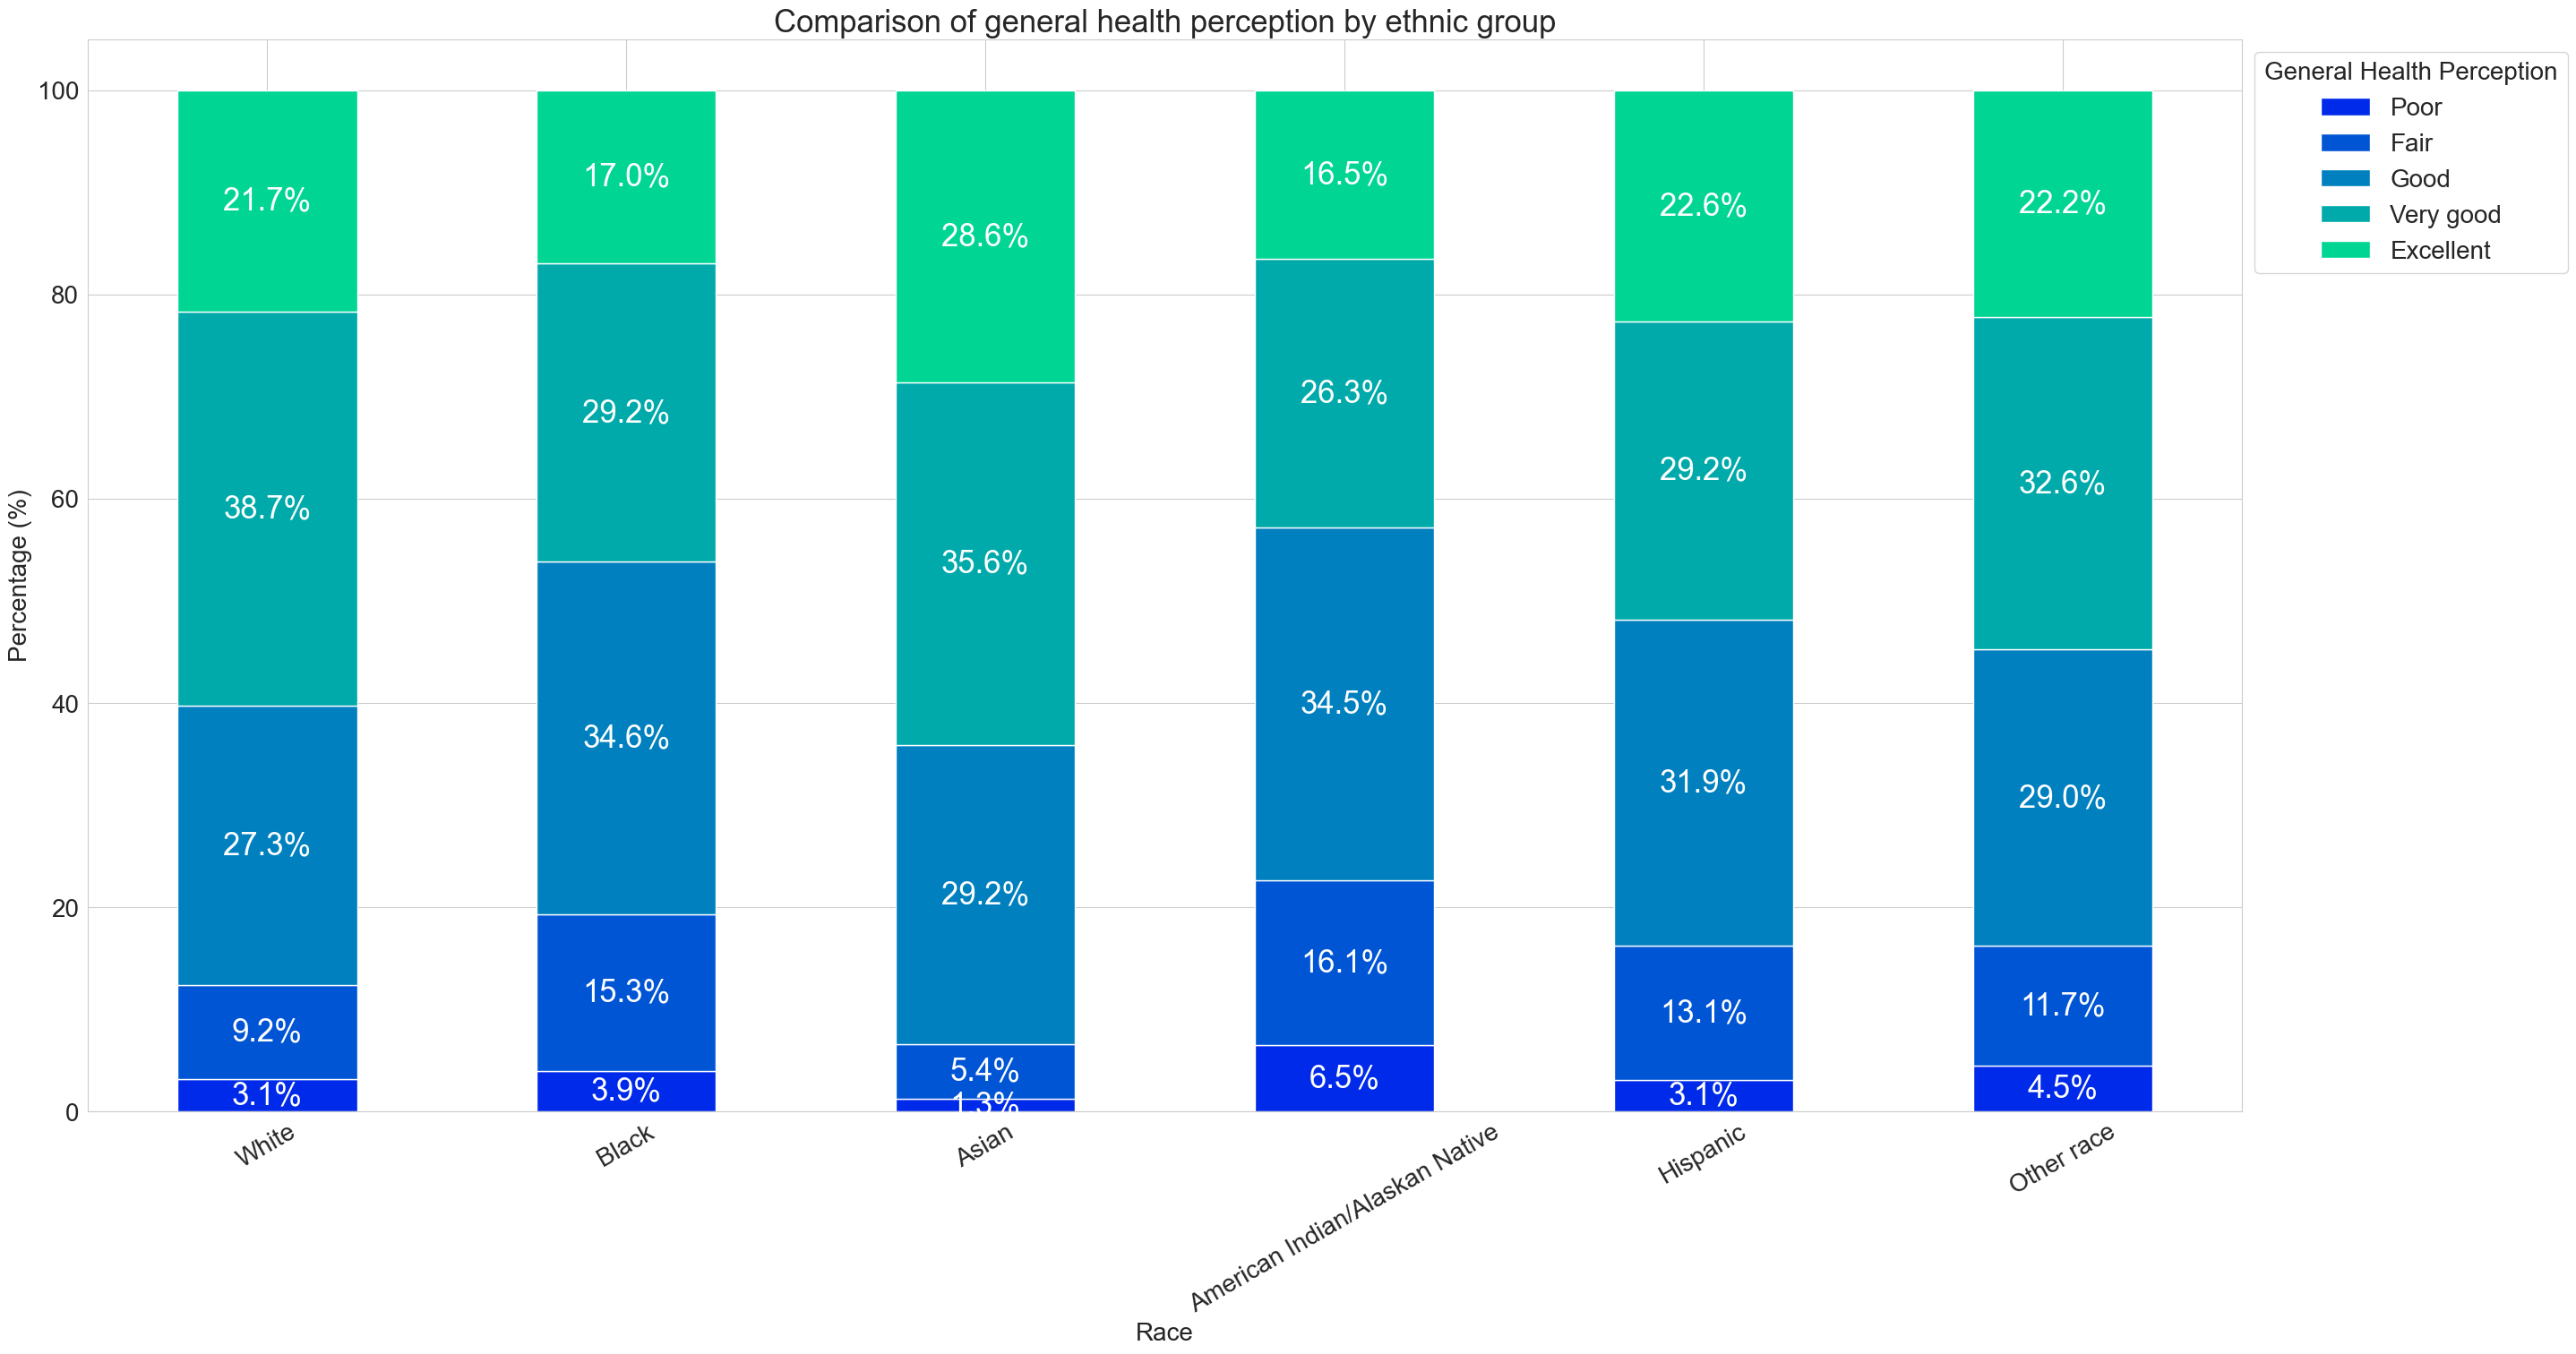

In [379]:
#Create the cross-tabulation to get the total count of people in each income group

crosstab_racehealth = pd.crosstab(df_prepared_final['race'], df_prepared_final['general_health'])
#crosstab_education_generalhealth = crosstab_education_generalhealth.reindex(education_order)

#Calculate the percentages for each category in the new cross-tabulation
stacked_data_racehealth = crosstab_racehealth.div(crosstab_racehealth.sum(axis = 1), axis = 0) * 100

#New order for the 'general_health' categories and reorder DataFrame based on that
new_health_order = ['Poor', 'Fair', 'Good', 'Very good', 'Excellent']
stacked_data_income_reordered = stacked_data_racehealth[new_health_order]

#Reverse the color palette for the stacked bar chart
palette = sns.color_palette('winter', len(new_health_order))

#Plot the reordered stacked bar chart with reversed color palette
ax = stacked_data_income_reordered.plot(kind = 'bar', stacked = True, figsize = (25, 15), color = palette)
plt.xlabel('Race', fontsize = 20)
plt.ylabel('Percentage (%)', fontsize = 20)
plt.title('Comparison of general health perception by ethnic group', fontsize = 25)

#Add percentage annotations on each bar segment
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    if height != 0:
        ax.annotate(f'{height:.1f}%', (x + width/2, y + height/2), ha = 'center', va = 'center', fontsize = 25, color = 'white')

plt.tight_layout()
plt.legend(title='General Health Perception', loc='upper left', bbox_to_anchor=(1.0, 1.0), fontsize=20, title_fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(rotation=30)
plt.show()

### 6. Multivariate Analysis

In this section, we explore the interrelationships among multiple variables, aiming to uncover comprehensive insights into the underlying patterns within the dataset.

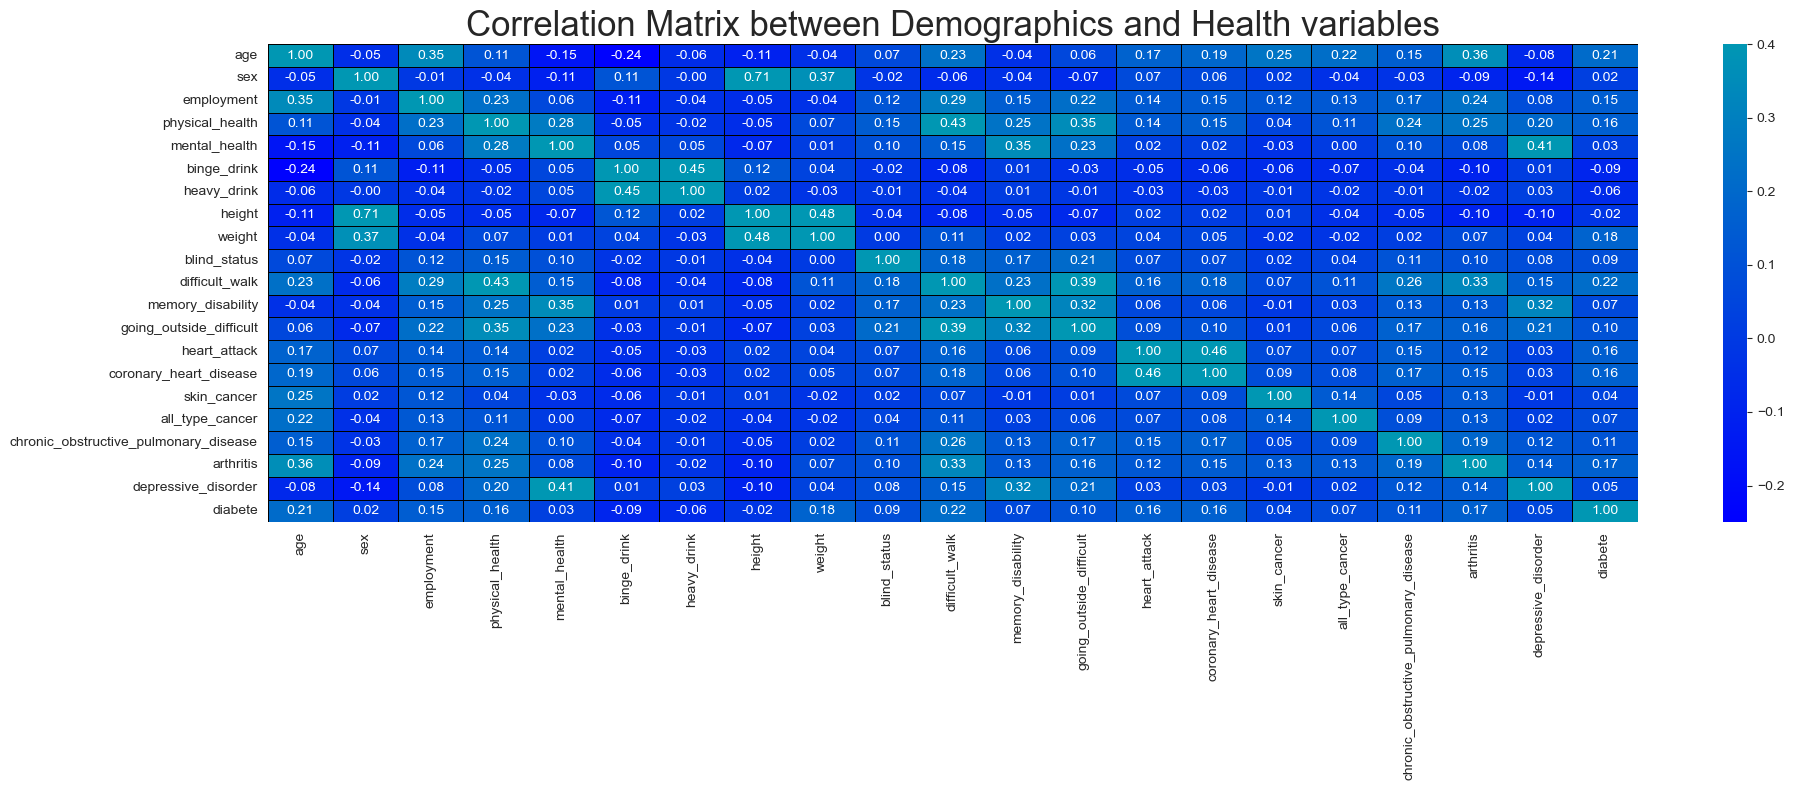

In [380]:
# Correlation Matrix between Demographics and Health variables

df_matrice3 = df_prepared_final[['age', 'sex', 'employment', 'physical_health', 'mental_health', 'binge_drink', 'heavy_drink', 'height', 'weight', 'blind_status', 'difficult_walk', 
                                 'memory_disability', 'going_outside_difficult', 'heart_attack', 'coronary_heart_disease', 'skin_cancer', 'all_type_cancer', 
                                 'chronic_obstructive_pulmonary_disease', 'arthritis', 'depressive_disorder', 'diabete']]

label_encoder = LabelEncoder()
df_matrice3_encoded = df_matrice3.apply(label_encoder.fit_transform)
corr_matrix3 = df_matrice3_encoded.corr()

plt.figure(figsize = (20, 8))
sns.heatmap(corr_matrix3, annot = True, cmap = 'winter', fmt = '.2f', vmin = -0.25, vmax = 0.4, center = 0.3, square = False, linewidths = 0.5, linecolor = 'black')
plt.title("Correlation Matrix between Demographics and Health variables", fontsize = 25)
plt.xticks(rotation = 90) 
plt.tight_layout()
plt.show()

<Figure size 2000x800 with 0 Axes>

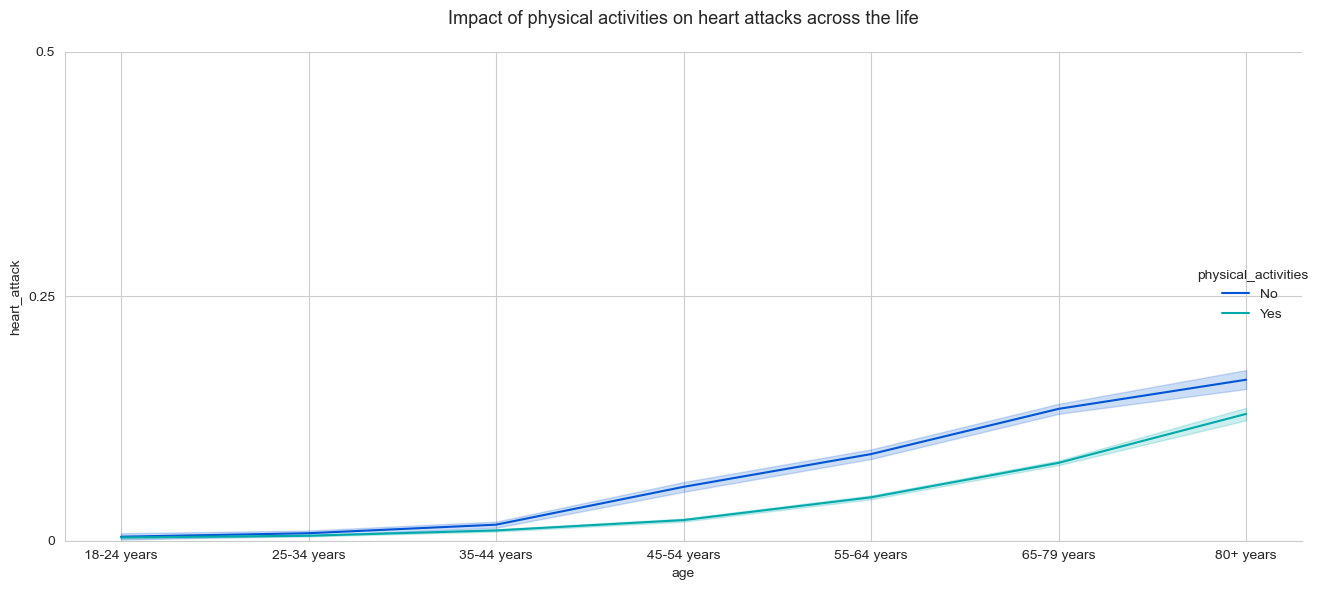

In [381]:
# Impact of physical activities on heart attacks across the life

plt.figure(figsize = (20, 8))
sns.relplot(data=df_prepared_final, kind="line", x="age", y="heart_attack", hue="physical_activities", palette='winter', height=6, aspect=2)
plt.yticks([0, 0.25, 0.5], ['0', '0.25', '0.5'])
plt.ylim(0, 0.5)
plt.title('Impact of physical activities on heart attacks across the life', fontsize=13, pad=20)
plt.tight_layout()
plt.show()

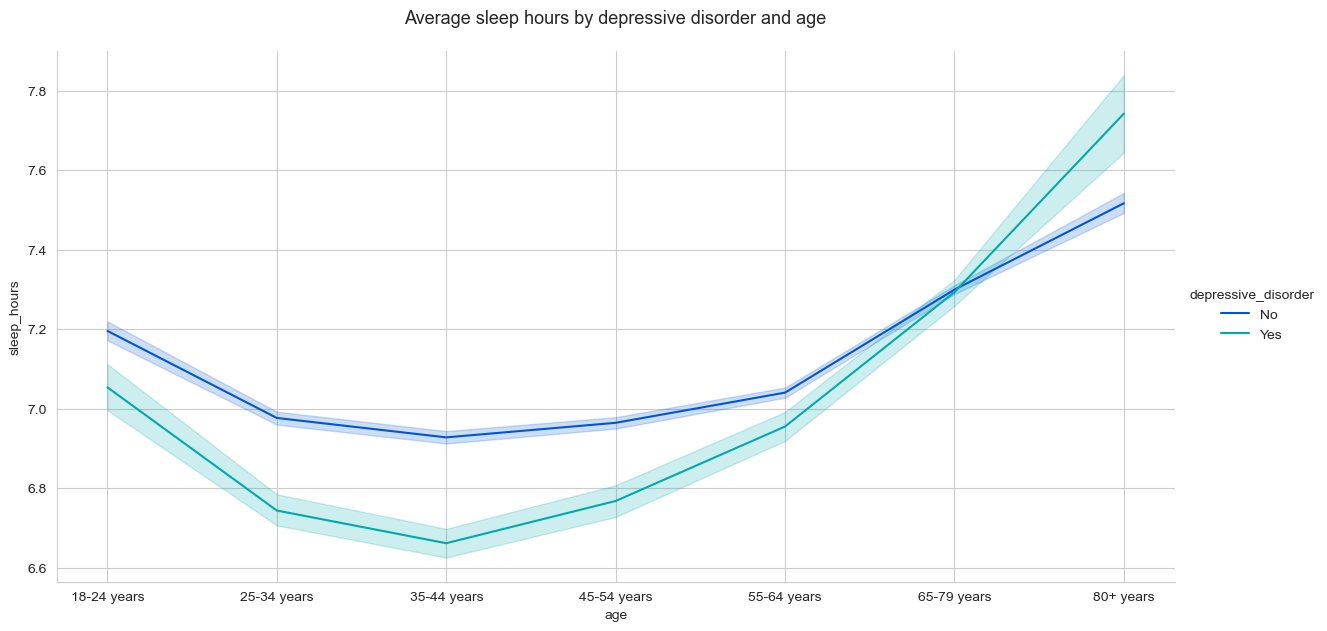

In [382]:
# Comparison of sleep hours between people with and without depressive disorder by age
sns.relplot(data=df_prepared_final, kind="line", x="age", y="sleep_hours", hue="depressive_disorder", palette='winter', height=6, aspect=2)
plt.title('Average sleep hours by depressive disorder and age', fontsize=13, pad=20)
plt.show()

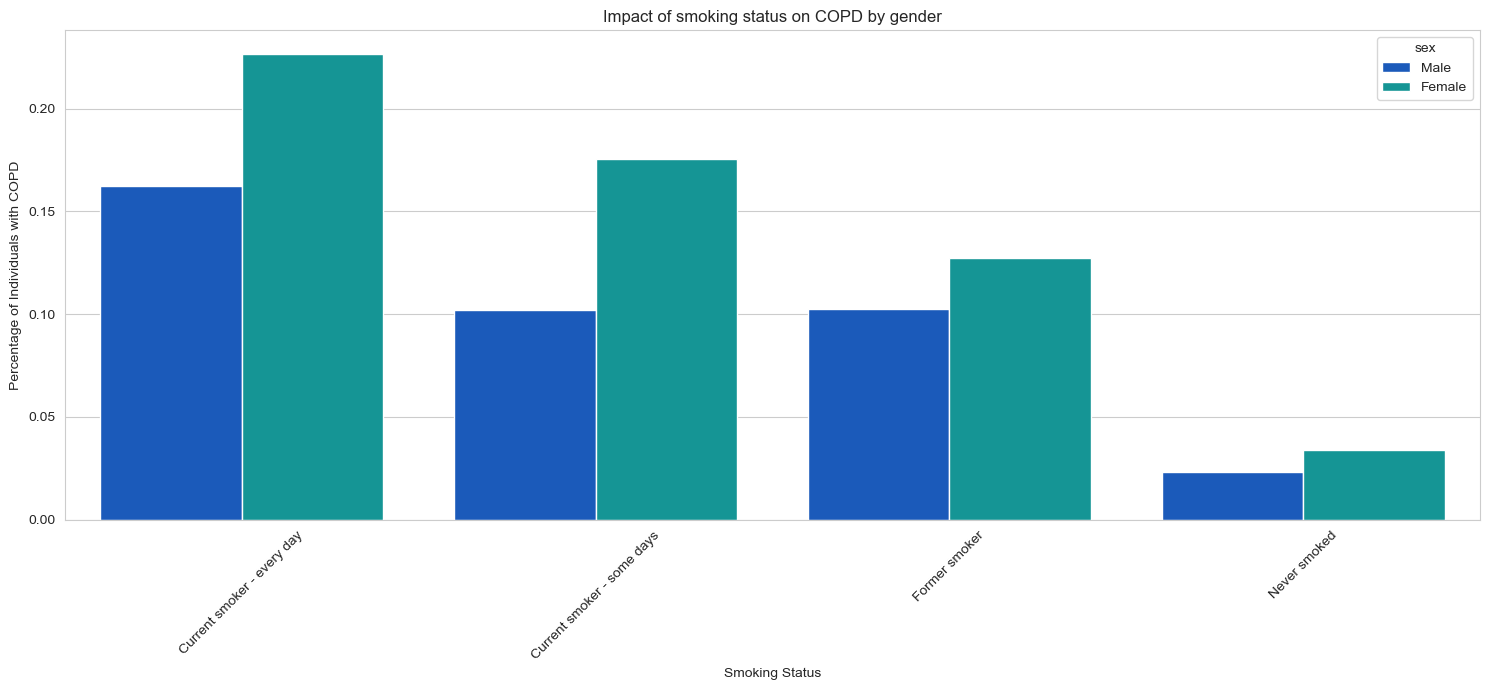

In [383]:
# Filtering the dataset to retain only the relevant columns
copd_data = df_prepared_final[['sex', 'smoking_status', 'chronic_obstructive_pulmonary_disease']]

# Computing the percentage of individuals with COPD based on their smoking status and gender
copd_rates = copd_data.groupby(['smoking_status', 'sex']).apply(lambda x: (x['chronic_obstructive_pulmonary_disease'] == 'Yes').mean()).reset_index()
copd_rates.columns = ['smoking_status', 'sex', 'copd_rate']

# Constructing the grouped bar plot
plt.figure(figsize=(15, 7))
sns.barplot(data=copd_rates, x='smoking_status', y='copd_rate', hue='sex', palette='winter')
plt.title("Impact of smoking status on COPD by gender")
plt.ylabel("Percentage of Individuals with COPD")
plt.xlabel("Smoking Status")
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()



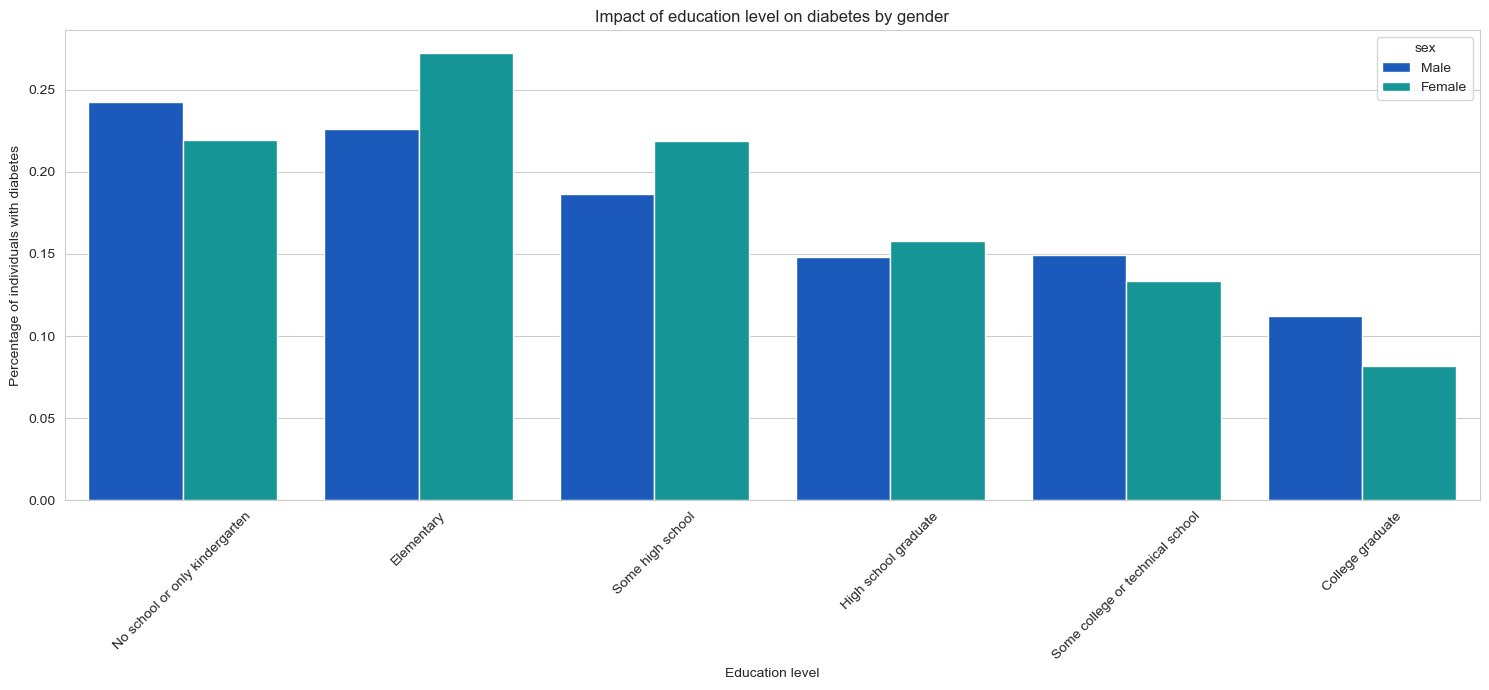

In [384]:
education_order = [
    'No school or only kindergarten',
    'Elementary',
    'Some high school',
    'High school graduate',
    'Some college or technical school',
    'College graduate'
]

# Filtering the dataset for the first additional visualization
diabetes_data = df_prepared_final[['sex', 'education_level', 'diabete']]

# Computing the percentage of individuals with diabetes based on their education level and gender
diabetes_rates = diabetes_data.groupby(['education_level', 'sex']).apply(lambda x: (x['diabete'] == 'Yes').mean()).reset_index()
diabetes_rates.columns = ['education_level', 'sex', 'diabetes_rate']

# Constructing the grouped bar plot with the custom order for education levels
plt.figure(figsize=(15, 7))
sns.barplot(data=diabetes_rates, x='education_level', y='diabetes_rate', hue='sex', order=education_order, palette='winter')
plt.title("Impact of education level on diabetes by gender")
plt.ylabel("Percentage of individuals with diabetes")
plt.xlabel("Education level")
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()




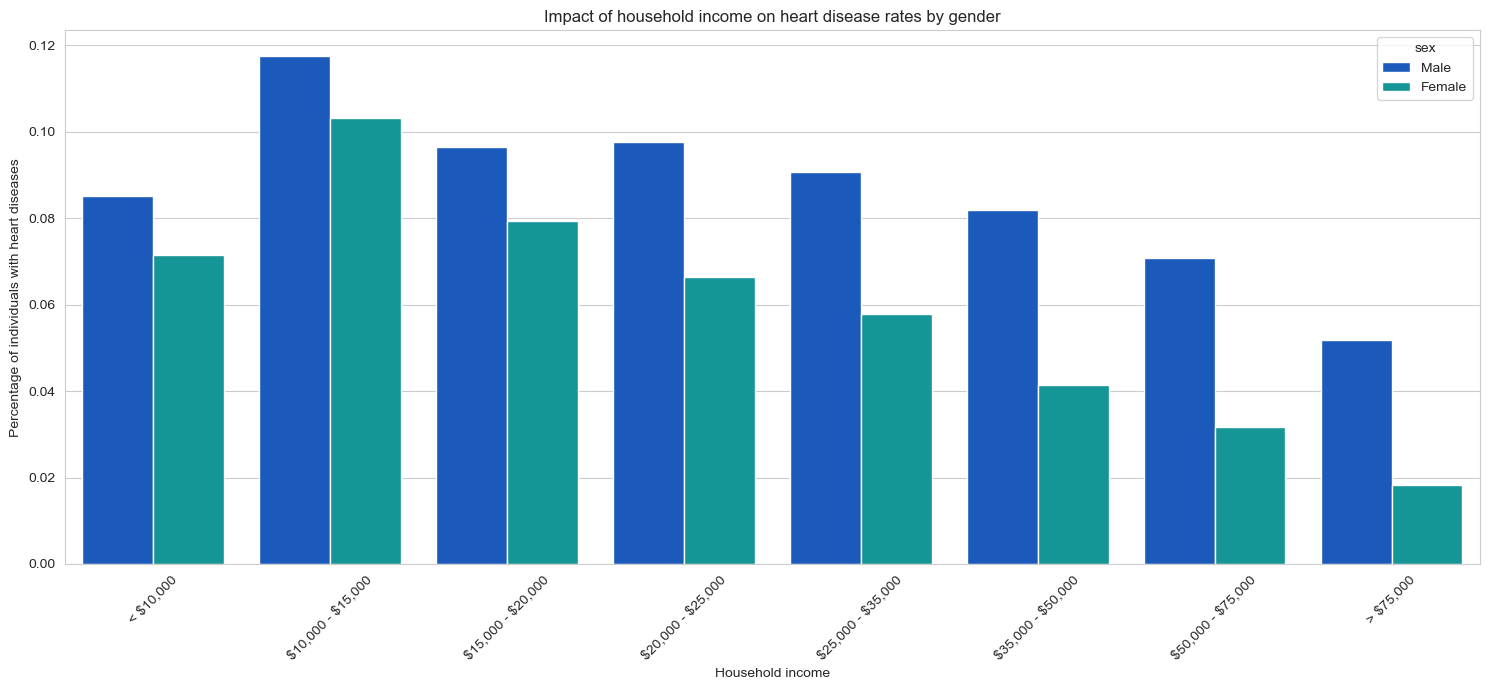

In [385]:
income_order = ['< \$10,000', '\$10,000 - \$15,000', '\$15,000 - \$20,000', '\$20,000 - \$25,000', '\$25,000 - \$35,000', '\$35,000 - \$50,000', '\$50,000 - \$75,000', '> \$75,000']

# Filtering the dataset for the second additional visualization
heart_disease_data = df_prepared_final[['sex', 'household_income', 'coronary_heart_disease']]

# Computing the percentage of individuals with heart diseases based on their household income and gender
heart_disease_rates = heart_disease_data.groupby(['household_income', 'sex']).apply(lambda x: (x['coronary_heart_disease'] == 'Yes').mean()).reset_index()
heart_disease_rates.columns = ['household_income', 'sex', 'heart_disease_rate']

# Constructing the grouped bar plot with the custom order for household income
plt.figure(figsize=(15, 7))
sns.barplot(data=heart_disease_rates, x='household_income', y='heart_disease_rate', hue='sex', order=income_order, palette='winter')
plt.title("Impact of household income on heart disease rates by gender")
plt.ylabel("Percentage of individuals with heart diseases")
plt.xlabel("Household income")
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()



### 7. Machine Learning

Moving on to the machine learning segment, we opted to leverage Dataiku, a no-code tool well-suited for this purpose. As a reminder, our goal is to predict the onset of diseases based on our dataset.

In the provided illustration, we present a workflow detailing the various steps involved in segmenting our dataset and implementing the machine learning models. For clarity, it's advisable to follow the color-coded circles. The blue circle contains our input dataset.

After a series of intermediate steps, we generate two datasets, denoted by the green circles: one for model training and the other for prediction data. We apply our previously established models to this prediction dataset to determine their accuracy.

The red circles represent our different models, each using a variable number of features based on their significance. Finally, the yellow circles display the prediction data for each model. This schema is specific to diabetes pathology. Given that we are examining 11 diseases, this workflow is replicated 11 times to account for all pathologies.

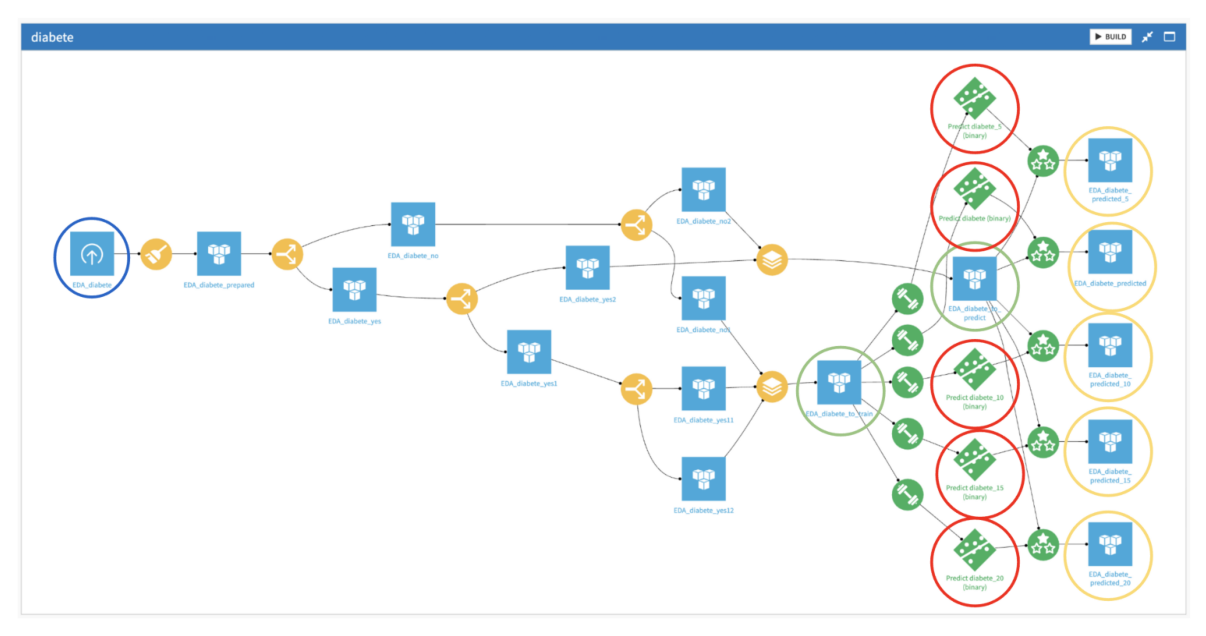

In [386]:
image = mpimg.imread("/Users/julieedme/Documents/Jedha/Data_Analysis_Fullstack/Projet_Demoday/MLdiabete.png")

plt.figure(figsize=(25, 8))
plt.imshow(image)
plt.axis('off')
plt.show()

Shifting our focus to the results, the provided table offers insights into various diseases, including the following aspects:

We highlight the most effective model employed during our analysis. The F1 score, chosen as our primary metric for each model, plays a crucial role in minimizing false negatives, especially in healthcare scenarios. It ensures that the model does not incorrectly predict the absence of a disease when it should be present.

We outline the specific feature handling techniques utilized, emphasizing the key features we retained for our analysis. Given the imbalanced nature of our dataset, we carefully managed the number of observations used by implementing down-sampling techniques.

Lastly, the table presents the accurate prediction score, demonstrating generally commendable results. For certain diseases, we acknowledge the potential need for further adjustments, such as fine-tuning hyperparameters and incorporating additional data to enhance the model's performance.

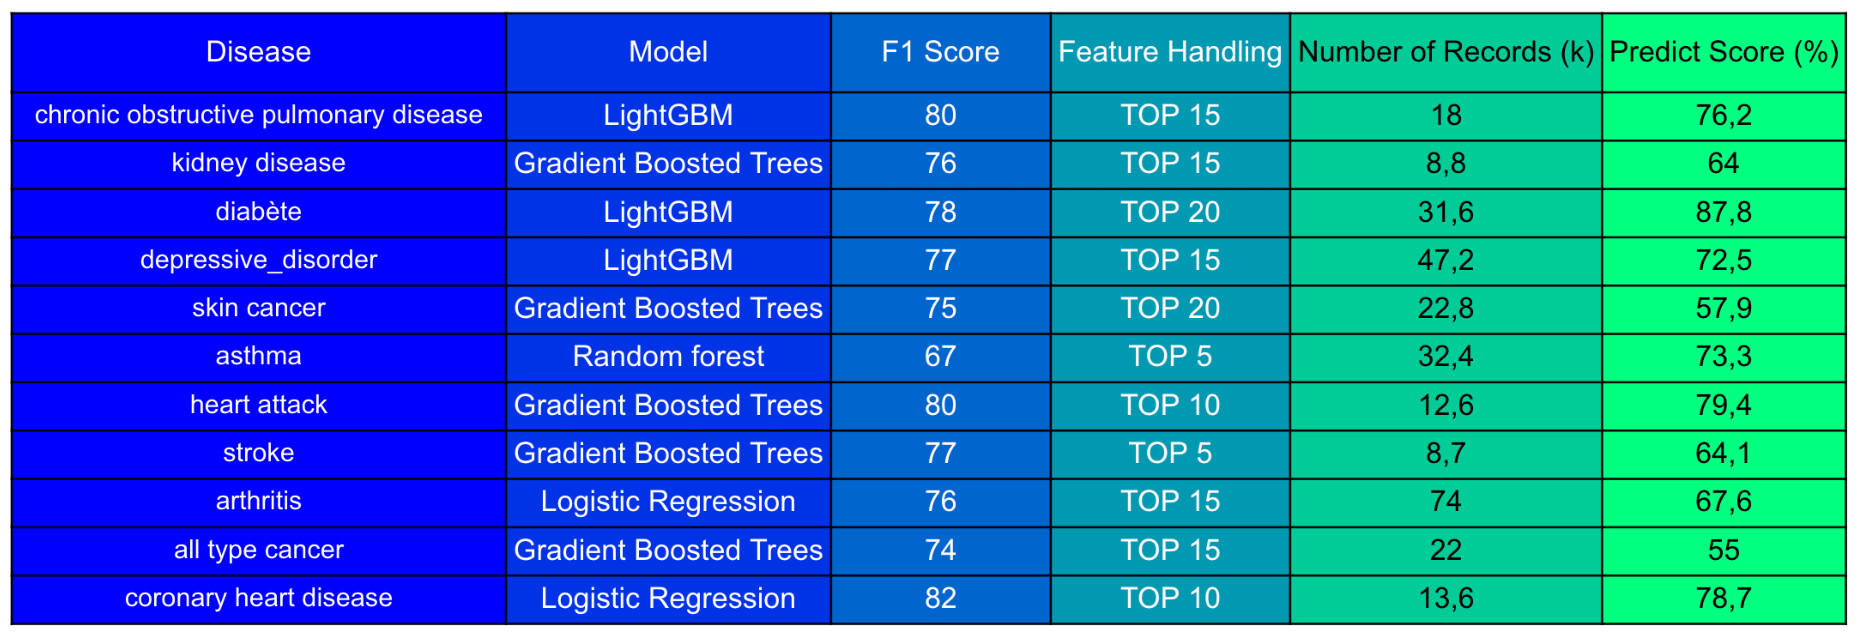

In [387]:
image = mpimg.imread("/Users/julieedme/Documents/Jedha/Data_Analysis_Fullstack/Projet_Demoday/tableauML.png")

plt.figure(figsize=(25, 8))
plt.imshow(image)
plt.axis('off')
plt.show()

### 8. Dashboard with Power BI

In this section, we present a comprehensive dashboard created using Power BI, showcasing the key insights and trends derived from our analysis of the cleaned dataset. Through interactive visualizations and intuitive representations, the Power BI dashboard offers a user-friendly interface for exploring the complexities within our dataset. The dashboard serves as a powerful tool for stakeholders to gain valuable and actionable insights from our analysis.

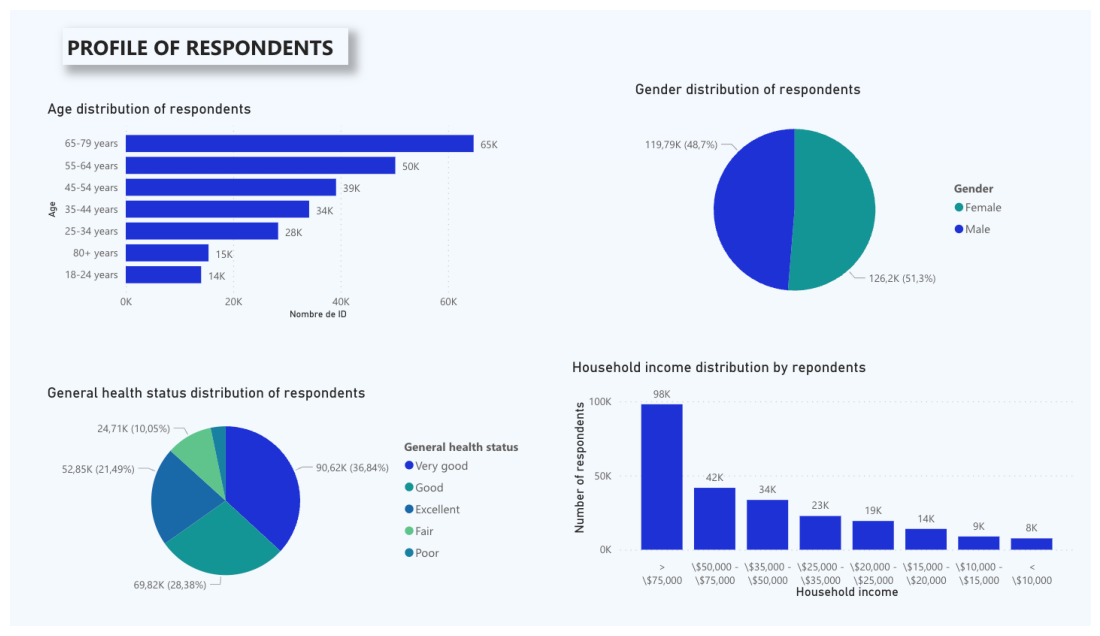

In [388]:
image = mpimg.imread("/Users/julieedme/Documents/Jedha/Data_Analysis_Fullstack/Projet_Demoday/PowerBi1.png")

plt.figure(figsize=(25, 8))
plt.imshow(image)
plt.axis('off')
plt.show()

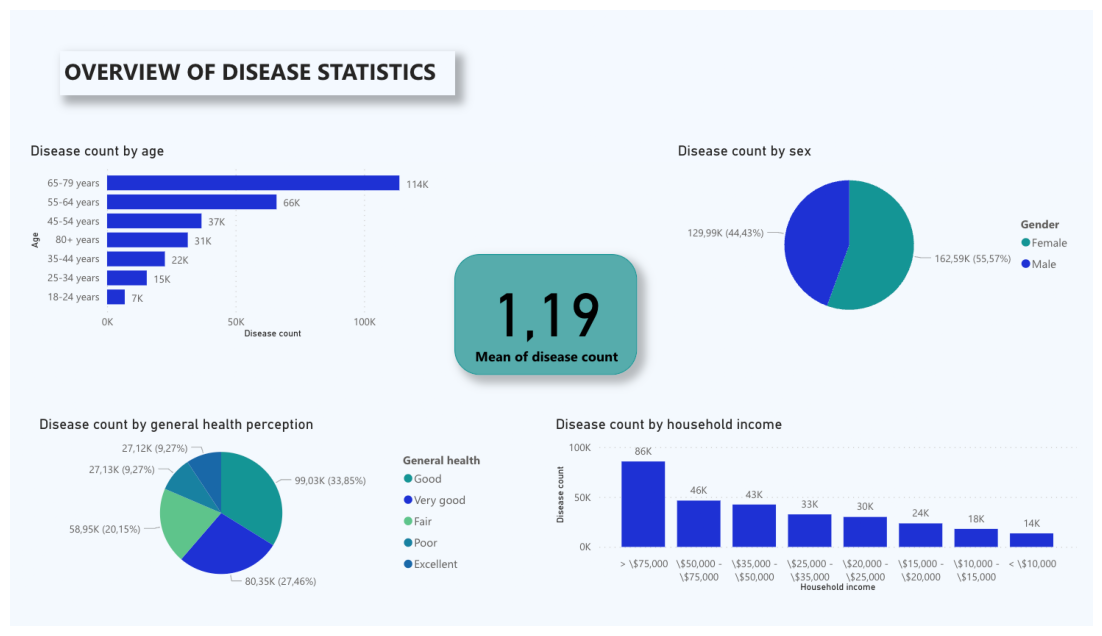

In [389]:
image = mpimg.imread("/Users/julieedme/Documents/Jedha/Data_Analysis_Fullstack/Projet_Demoday/PowerBi2.png")

plt.figure(figsize=(25, 8))
plt.imshow(image)
plt.axis('off')
plt.show()

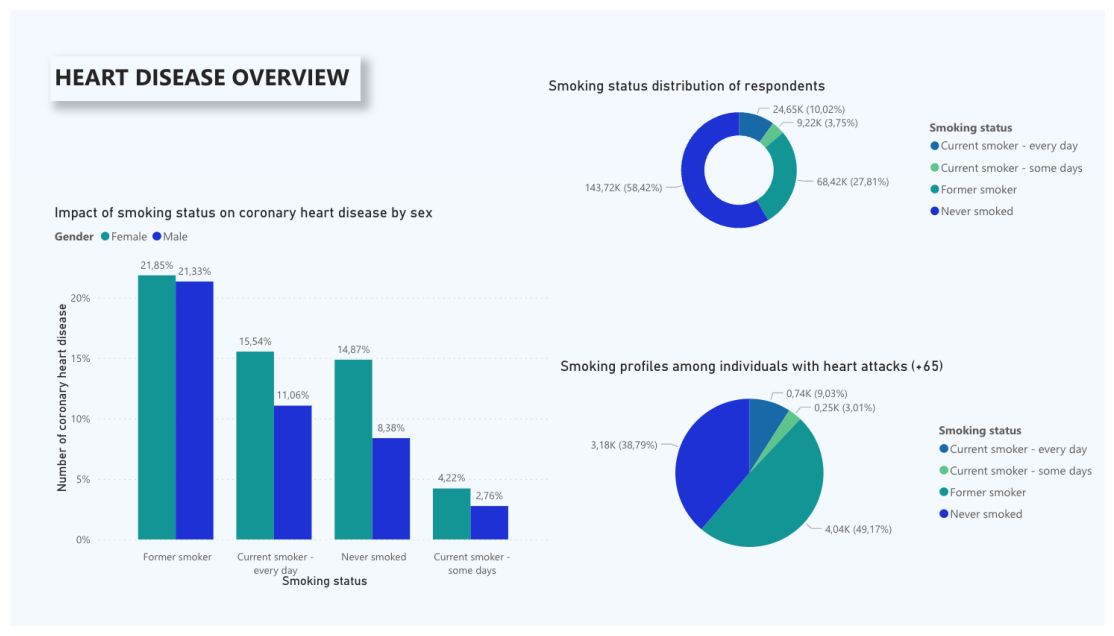

In [390]:
image = mpimg.imread("/Users/julieedme/Documents/Jedha/Data_Analysis_Fullstack/Projet_Demoday/PowerBi3.png")

plt.figure(figsize=(25, 8))
plt.imshow(image)
plt.axis('off')
plt.show()

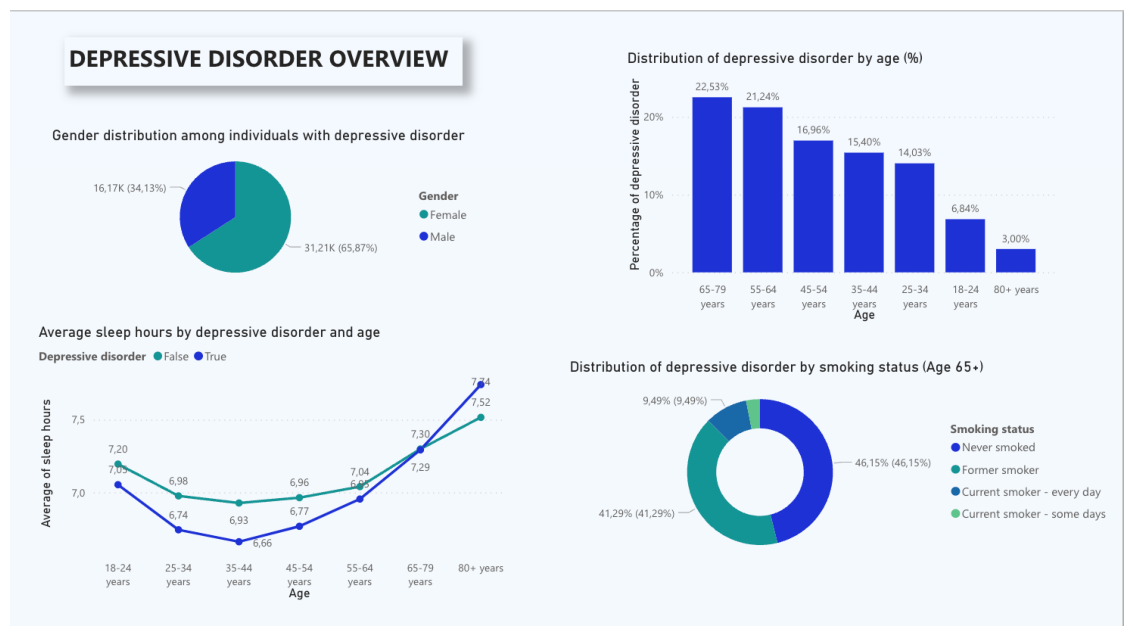

In [391]:
image = mpimg.imread("/Users/julieedme/Documents/Jedha/Data_Analysis_Fullstack/Projet_Demoday/PowerBi4.png")

plt.figure(figsize=(25, 8))
plt.imshow(image)
plt.axis('off')
plt.show()

### 9. Conclusion

In conclusion, this project has been a substantial learning experience, allowing us to apply much of what we have acquired throughout the boot camp. While our machine learning analysis has yielded insightful results, there is room for improvement. For instance, having access to more data or introducing new features reflecting dietary habits or workplace stress for employed individuals could prove beneficial.

Another avenue to explore would be to compare our data with that of the previous year's BRFSS survey. Additionally, developing an application that provides personalized predictions to users could be a valuable next step. Such a tool could also gather data anonymously, refining our prediction models further.

Overall, our project underscores the significance of continuous refinement and innovation in data analysis and predictive modeling for improved public health strategies and interventions.